# Load Dataset and Perform Progressive EDA

In [1]:
import pandas as pd

fifa = pd.read_csv('Datasets/fifa20.csv')
fifa.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

Evidently, there are many features, but I need to determine which are relevant and which are to be eliminated.

I have decided that a player's attributes (physical, technical, mental, etc) and his playing style/characteristics will be the features that will be kept for similarity calculations, in the second phase of this project.

Other features that will be kept, but not required for the subsequent distance-based calculations, will be features related to the player's costs and basic information - his current club, his nationality, the wage bill, the transfer value, etc.

Everything else will be dropped and eliminated.

#### 1st round of prelimnary feature elimination:

In [2]:
# drop irrelevant columns:

fifa.drop(columns = ['sofifa_id', 'player_url', 'dob', 'height_cm', 'weight_kg'], inplace=True)
fifa.shape

(18278, 99)

In [3]:
fifa.columns

Index(['short_name', 'long_name', 'age', 'nationality', 'club', 'overall',
       'potential', 'value_eur', 'wage_eur', 'player_positions',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'team_position',
       'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until',
       'nation_position', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'player_traits', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'mo

In [4]:
fifa.preferred_foot.unique()

array(['Left', 'Right'], dtype=object)

In [5]:
fifa.weak_foot

0        4
1        4
2        5
3        3
4        4
        ..
18273    3
18274    2
18275    2
18276    2
18277    3
Name: weak_foot, Length: 18278, dtype: int64

As per the [website](https://www.fifplay.com/encyclopedia/weak-foot/):

*A player's foot (left or right) that is weaker than their preferred foot. A player's attribute rated between 1 to 5 which specifies the shot power and ball control for the other foot of that player than his preferred foot's. The higher rate defines the higher shot power and ball control.*

Two-footedness is an important attribute to have for any footballer. I will leave both of these features in;  only `weak_foot` will be considered in the recommender scoring metrics, so as to pay more attention to the ambipedal-ness of each player, whereas `preferred_foot` will simply form part of the basic information of the player (much like club, nationality, etc).

In [6]:
# drop more irrelevant columns, now that I am able to see the full list of columns and understand more of the features:

fifa.drop(columns = ['nation_jersey_number', 'team_jersey_number'], inplace = True)
fifa.shape

(18278, 97)

In [7]:
fifa.head()

short_name                            long_name  age nationality  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32   Argentina   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34    Portugal   
2          Neymar Jr        Neymar da Silva Santos Junior   27      Brazil   
3           J. Oblak                            Jan Oblak   26    Slovenia   
4          E. Hazard                          Eden Hazard   28     Belgium   

                  club  overall  potential  value_eur  wage_eur  \
0         FC Barcelona       94         94   95500000    565000   
1             Juventus       93         93   58500000    405000   
2  Paris Saint-Germain       92         92  105500000    290000   
3      Atlético Madrid       91         93   77500000    125000   
4          Real Madrid       91         91   90000000    470000   

  player_positions  ...   lwb   ldm   cdm   rdm   rwb    lb   lcb    cb   rcb  \
0       RW, CF, ST  ...  68+2  66+2  66+2  66+2  68+2  63+2  52+2  52+2  52+2   
1           ST, LW  ...  65+3  61+3  61+3  61+3  65+3  61+3  53+3  53+3  53+3   
2          LW, CAM  ...  66+3  61+3  61+3  61+3  66+3  61+3  46+3  46+3  46+3   
3               GK  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4           LW, CF  ...  66+3  63+3  63+3  63+3  66+3  61+3  49+3  49+3  49+3   

     rb  
0  63+2  
1  61+3  
2  61+3  
3   NaN  
4  61+3  

[5 rows x 97 columns]

In [8]:
fifa.loc[fifa.short_name == 'M. Ozil']

Empty DataFrame
Columns: [short_name, long_name, age, nationality, club, overall, potential, value_eur, wage_eur, player_positions, preferred_foot, international_reputation, weak_foot, skill_moves, work_rate, body_type, real_face, release_clause_eur, player_tags, team_position, loaned_from, joined, contract_valid_until, nation_position, pace, shooting, passing, dribbling, defending, physic, gk_diving, gk_handling, gk_kicking, gk_reflexes, gk_speed, gk_positioning, player_traits, attacking_crossing, attacking_finishing, attacking_heading_accuracy, attacking_short_passing, attacking_volleys, skill_dribbling, skill_curve, skill_fk_accuracy, skill_long_passing, skill_ball_control, movement_acceleration, movement_sprint_speed, movement_agility, movement_reactions, movement_balance, power_shot_power, power_jumping, power_stamina, power_strength, power_long_shots, mentality_aggression, mentality_interceptions, mentality_positioning, mentality_vision, mentality_penalties, mentality_composure, defending_marking, defending_standing_tackle, defending_sliding_tackle, goalkeeping_diving, goalkeeping_handling, goalkeeping_kicking, goalkeeping_positioning, goalkeeping_reflexes, ls, st, rs, lw, lf, cf, rf, rw, lam, cam, ram, lm, lcm, cm, rcm, rm, lwb, ldm, cdm, rdm, rwb, lb, lcb, cb, rcb, rb]
Index: []

[0 rows x 97 columns]

In [9]:
fifa.loc[fifa.short_name == 'M. Özil']

short_name   long_name  age nationality     club  overall  potential  \
135    M. Özil  Mesut Özil   30     Germany  Arsenal       84         84   

     value_eur  wage_eur player_positions  ...   lwb   ldm   cdm   rdm   rwb  \
135   29500000    125000          CAM, RW  ...  57+3  55+3  55+3  55+3  57+3   

       lb   lcb    cb   rcb    rb  
135  51+3  39+3  39+3  39+3  51+3  

[1 rows x 97 columns]

I also noted the use of accents (characters such as "Ö") in the FIFA dataset. Hence, for convenience purposes, will proceed to de-accent the 'short_name' and 'long_name' columns.

#### Preprocess FIFA names and replace accented-alphabets with English alphabets

In [10]:
# unidecode library helps to achieve that

import unidecode as uni

In [11]:
short_name_deacc = []
long_name_deacc = []

for item in fifa.short_name:
    item = uni.unidecode(item)
    short_name_deacc.append(item)

for item in fifa.long_name:
    item = uni.unidecode(item)
    long_name_deacc.append(item)

print(len(short_name_deacc))
print(len(long_name_deacc))

18278
18278


In [12]:
fifa['short_name_deacc'] = short_name_deacc
fifa['long_name_deacc'] = long_name_deacc

fifa.drop(columns = ['short_name', 'long_name'], inplace = True)
fifa.head()

age nationality                 club  overall  potential  value_eur  \
0   32   Argentina         FC Barcelona       94         94   95500000   
1   34    Portugal             Juventus       93         93   58500000   
2   27      Brazil  Paris Saint-Germain       92         92  105500000   
3   26    Slovenia      Atlético Madrid       91         93   77500000   
4   28     Belgium          Real Madrid       91         91   90000000   

   wage_eur player_positions preferred_foot  international_reputation  ...  \
0    565000       RW, CF, ST           Left                         5  ...   
1    405000           ST, LW          Right                         5  ...   
2    290000          LW, CAM          Right                         5  ...   
3    125000               GK          Right                         3  ...   
4    470000           LW, CF          Right                         4  ...   

    cdm   rdm   rwb    lb   lcb    cb   rcb    rb   short_name_deacc  \
0  66+2  66+2  68+2  63+2  52+2  52+2  52+2  63+2           L. Messi   
1  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3  Cristiano Ronaldo   
2  61+3  61+3  66+3  61+3  46+3  46+3  46+3  61+3          Neymar Jr   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN           J. Oblak   
4  63+3  63+3  66+3  61+3  49+3  49+3  49+3  61+3          E. Hazard   

                       long_name_deacc  
0       Lionel Andres Messi Cuccittini  
1  Cristiano Ronaldo dos Santos Aveiro  
2        Neymar da Silva Santos Junior  
3                            Jan Oblak  
4                          Eden Hazard  

[5 rows x 97 columns]

In [13]:
# rearrange columns

cols_at_start = ['short_name_deacc', 'long_name_deacc']
fifa = fifa[[col for col in fifa if col in cols_at_start] 
        + [col for col in fifa if col not in cols_at_start]]
fifa.head()

short_name_deacc                      long_name_deacc  age nationality  \
0           L. Messi       Lionel Andres Messi Cuccittini   32   Argentina   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34    Portugal   
2          Neymar Jr        Neymar da Silva Santos Junior   27      Brazil   
3           J. Oblak                            Jan Oblak   26    Slovenia   
4          E. Hazard                          Eden Hazard   28     Belgium   

                  club  overall  potential  value_eur  wage_eur  \
0         FC Barcelona       94         94   95500000    565000   
1             Juventus       93         93   58500000    405000   
2  Paris Saint-Germain       92         92  105500000    290000   
3      Atlético Madrid       91         93   77500000    125000   
4          Real Madrid       91         91   90000000    470000   

  player_positions  ...   lwb   ldm   cdm   rdm   rwb    lb   lcb    cb   rcb  \
0       RW, CF, ST  ...  68+2  66+2  66+2  66+2  68+2  63+2  52+2  52+2  52+2   
1           ST, LW  ...  65+3  61+3  61+3  61+3  65+3  61+3  53+3  53+3  53+3   
2          LW, CAM  ...  66+3  61+3  61+3  61+3  66+3  61+3  46+3  46+3  46+3   
3               GK  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4           LW, CF  ...  66+3  63+3  63+3  63+3  66+3  61+3  49+3  49+3  49+3   

     rb  
0  63+2  
1  61+3  
2  61+3  
3   NaN  
4  61+3  

[5 rows x 97 columns]

In [14]:
# rename columns to as per original:

fifa.rename(columns={"short_name_deacc": "short_name", "long_name_deacc": "long_name"}, inplace = True)

fifa.head()

short_name                            long_name  age nationality  \
0           L. Messi       Lionel Andres Messi Cuccittini   32   Argentina   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34    Portugal   
2          Neymar Jr        Neymar da Silva Santos Junior   27      Brazil   
3           J. Oblak                            Jan Oblak   26    Slovenia   
4          E. Hazard                          Eden Hazard   28     Belgium   

                  club  overall  potential  value_eur  wage_eur  \
0         FC Barcelona       94         94   95500000    565000   
1             Juventus       93         93   58500000    405000   
2  Paris Saint-Germain       92         92  105500000    290000   
3      Atlético Madrid       91         93   77500000    125000   
4          Real Madrid       91         91   90000000    470000   

  player_positions  ...   lwb   ldm   cdm   rdm   rwb    lb   lcb    cb   rcb  \
0       RW, CF, ST  ...  68+2  66+2  66+2  66+2  68+2  63+2  52+2  52+2  52+2   
1           ST, LW  ...  65+3  61+3  61+3  61+3  65+3  61+3  53+3  53+3  53+3   
2          LW, CAM  ...  66+3  61+3  61+3  61+3  66+3  61+3  46+3  46+3  46+3   
3               GK  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4           LW, CF  ...  66+3  63+3  63+3  63+3  66+3  61+3  49+3  49+3  49+3   

     rb  
0  63+2  
1  61+3  
2  61+3  
3   NaN  
4  61+3  

[5 rows x 97 columns]

It is also noteworthy that all the positional scores and technical/mental/player-attribute scores in FIFA has a "+X" value to them - something of a booster score when the player is in-form.

Conversely, if a player is out-of-form, a "-X" value is assigned to the baseline score.

In [15]:
# seperate and classify features into different categories for more efficient EDA

fifa_pos_scores = ['lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb', 'ls', 'st', 'rs']

fifa_technical_attr = ['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys',
 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance',
 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
 'defending_standing_tackle', 'defending_sliding_tackle', 'defending_marking']

fifa_mental_attr = ['mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure']

fifa_summarized_attr = ['overall', 'potential', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',]

fifa_overall_attr = fifa_technical_attr + fifa_mental_attr

In [16]:
fifa[fifa_pos_scores]

lw    lf    cf    rf    rw   lam   cam   ram    lm   lcm  ...   rdm  \
0      93+2  93+2  93+2  93+2  93+2  93+2  93+2  93+2  92+2  87+2  ...  66+2   
1      89+3  90+3  90+3  90+3  89+3  88+3  88+3  88+3  88+3  81+3  ...  61+3   
2      90+3  89+3  89+3  89+3  90+3  90+3  90+3  90+3  89+3  82+3  ...  61+3   
3       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
4      89+3  88+3  88+3  88+3  89+3  89+3  89+3  89+3  89+3  83+3  ...  63+3   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
18273  31+2  31+2  31+2  31+2  31+2  31+2  31+2  31+2  33+2  33+2  ...  42+2   
18274  33+2  32+2  32+2  32+2  33+2  33+2  33+2  33+2  35+2  36+2  ...  43+2   
18275  43+2  43+2  43+2  43+2  43+2  44+2  44+2  44+2  45+2  46+2  ...  49+2   
18276  45+2  44+2  44+2  44+2  45+2  46+2  46+2  46+2  46+2  46+2  ...  48+2   
18277  44+2  43+2  43+2  43+2  44+2  46+2  46+2  46+2  46+2  46+2  ...  49+2   

        rwb    lb   lcb    cb   rcb    rb    ls    st    rs  
0      68+2  63+2  52+2  52+2  52+2  63+2  89+2  89+2  89+2  
1      65+3  61+3  53+3  53+3  53+3  61+3  91+3  91+3  91+3  
2      66+3  61+3  46+3  46+3  46+3  61+3  84+3  84+3  84+3  
3       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4      66+3  61+3  49+3  49+3  49+3  61+3  83+3  83+3  83+3  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...  
18273  43+2  45+2  46+2  46+2  46+2  45+2  32+2  32+2  32+2  
18274  44+2  46+2  47+2  47+2  47+2  46+2  33+2  33+2  33+2  
18275  47+2  47+2  49+2  49+2  49+2  47+2  43+2  43+2  43+2  
18276  48+2  48+2  49+2  49+2  49+2  48+2  43+2  43+2  43+2  
18277  48+2  48+2  50+2  50+2  50+2  48+2  42+2  42+2  42+2  

[18278 rows x 26 columns]

In [17]:
fifa[fifa_pos_scores].dtypes

lw     object
lf     object
cf     object
rf     object
rw     object
lam    object
cam    object
ram    object
lm     object
lcm    object
cm     object
rcm    object
rm     object
lwb    object
ldm    object
cdm    object
rdm    object
rwb    object
lb     object
lcb    object
cb     object
rcb    object
rb     object
ls     object
st     object
rs     object
dtype: object

In [18]:
fifa[fifa_overall_attr]

attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0                      88                   95                          70   
1                      84                   94                          89   
2                      87                   87                          62   
3                      13                   11                          15   
4                      81                   84                          61   
...                   ...                  ...                         ...   
18273                  21                   17                          40   
18274                  24                   20                          42   
18275                  32                   33                          49   
18276                  39                   34                          47   
18277                  44                   30                          48   

       attacking_short_passing  attacking_volleys  skill_dribbling  \
0                           92                 88               97   
1                           83                 87               89   
2                           87                 87               96   
3                           43                 13               12   
4                           89                 83               95   
...                        ...                ...              ...   
18273                       35                 27               24   
18274                       43                 28               32   
18275                       53                 32               40   
18276                       54                 28               42   
18277                       58                 25               40   

       skill_curve  skill_fk_accuracy  skill_long_passing  skill_ball_control  \
0               93                 94                  92                  96   
1               81                 76                  77                  92   
2               88                 87                  81                  95   
3               13                 14                  40                  30   
4               83                 79                  83                  94   
...            ...                ...                 ...                 ...   
18273           23                 21                  28                  35   
18274           24                 29                  39                  31   
18275           32                 32                  55                  49   
18276           37                 39                  48                  49   
18277           34                 35                  52                  46   

       ...  power_long_shots  defending_standing_tackle  \
0      ...                94                         37   
1      ...                93                         32   
2      ...                84                         26   
3      ...                12                         12   
4      ...                80                         27   
...    ...               ...                        ...   
18273  ...                16                         50   
18274  ...                20                         53   
18275  ...                26                         52   
18276  ...                28                         44   
18277  ...                30                         42   

       defending_sliding_tackle  defending_marking  mentality_aggression  \
0                            26                 33                    48   
1                            24                 28                    63   
2                            29                 27                    51   
3                            18                 27                    34   
4                            22                 34                    54   
...                         ...                ...                   ...   
18273          

In [19]:
fifa[fifa_overall_attr].dtypes

attacking_crossing            int64
attacking_finishing           int64
attacking_heading_accuracy    int64
attacking_short_passing       int64
attacking_volleys             int64
skill_dribbling               int64
skill_curve                   int64
skill_fk_accuracy             int64
skill_long_passing            int64
skill_ball_control            int64
movement_acceleration         int64
movement_sprint_speed         int64
movement_agility              int64
movement_reactions            int64
movement_balance              int64
power_shot_power              int64
power_jumping                 int64
power_stamina                 int64
power_strength                int64
power_long_shots              int64
defending_standing_tackle     int64
defending_sliding_tackle      int64
defending_marking             int64
mentality_aggression          int64
mentality_interceptions       int64
mentality_positioning         int64
mentality_vision              int64
mentality_penalties         

In [20]:
fifa[fifa_summarized_attr]

overall  potential  pace  shooting  passing  dribbling  defending  \
0           94         94  87.0      92.0     92.0       96.0       39.0   
1           93         93  90.0      93.0     82.0       89.0       35.0   
2           92         92  91.0      85.0     87.0       95.0       32.0   
3           91         93   NaN       NaN      NaN        NaN        NaN   
4           91         91  91.0      83.0     86.0       94.0       35.0   
...        ...        ...   ...       ...      ...        ...        ...   
18273       48         56  57.0      23.0     28.0       33.0       47.0   
18274       48         56  58.0      24.0     33.0       35.0       48.0   
18275       48         56  54.0      35.0     44.0       45.0       48.0   
18276       48         54  59.0      35.0     47.0       47.0       45.0   
18277       48         51  60.0      32.0     51.0       45.0       47.0   

       physic  
0        66.0  
1        78.0  
2        58.0  
3         NaN  
4        66.0  
...       ...  
18273    51.0  
18274    48.0  
18275    51.0  
18276    52.0  
18277    55.0  

[18278 rows x 8 columns]

In [21]:
fifa[fifa_summarized_attr].dtypes

overall        int64
potential      int64
pace         float64
shooting     float64
passing      float64
dribbling    float64
defending    float64
physic       float64
dtype: object

In [22]:
fifa[fifa_mental_attr]

mentality_aggression  mentality_interceptions  mentality_positioning  \
0                        48                       40                     94   
1                        63                       29                     95   
2                        51                       36                     87   
3                        34                       19                     11   
4                        54                       41                     87   
...                     ...                      ...                    ...   
18273                    46                       48                     28   
18274                    42                       49                     23   
18275                    50                       45                     38   
18276                    57                       49                     31   
18277                    54                       47                     29   

       mentality_vision  mentality_penalties  mentality_composure  
0                    94                   75                   96  
1                    82                   85                   95  
2                    90                   90                   94  
3                    65                   11                   68  
4                    89                   88                   91  
...                 ...                  ...                  ...  
18273                25                   39                   41  
18274                25                   37                   35  
18275                38                   36                   39  
18276                48                   36                   40  
18277                52                   38                   42  

[18278 rows x 6 columns]

In [23]:
fifa[fifa_mental_attr].dtypes

mentality_aggression       int64
mentality_interceptions    int64
mentality_positioning      int64
mentality_vision           int64
mentality_penalties        int64
mentality_composure        int64
dtype: object

For ease of comparison, and the assumption that players will regress to the mean, I will simply use the baseline attributes of each player, i.e. use regex to remove all the "+X" and "-X".

In [24]:
import re

for col in fifa_pos_scores:
    fifa[col] = fifa[col].str.extract('(\d\d)')
    
fifa[fifa_pos_scores]

lw   lf   cf   rf   rw  lam  cam  ram   lm  lcm  ...  rdm  rwb   lb  \
0       93   93   93   93   93   93   93   93   92   87  ...   66   68   63   
1       89   90   90   90   89   88   88   88   88   81  ...   61   65   61   
2       90   89   89   89   90   90   90   90   89   82  ...   61   66   61   
3      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
4       89   88   88   88   89   89   89   89   89   83  ...   63   66   61   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
18273   31   31   31   31   31   31   31   31   33   33  ...   42   43   45   
18274   33   32   32   32   33   33   33   33   35   36  ...   43   44   46   
18275   43   43   43   43   43   44   44   44   45   46  ...   49   47   47   
18276   45   44   44   44   45   46   46   46   46   46  ...   48   48   48   
18277   44   43   43   43   44   46   46   46   46   46  ...   49   48   48   

       lcb   cb  rcb   rb   ls   st   rs  
0       52   52   52   63   89   89   89  
1       53   53   53   61   91   91   91  
2       46   46   46   61   84   84   84  
3      NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4       49   49   49   61   83   83   83  
...    ...  ...  ...  ...  ...  ...  ...  
18273   46   46   46   45   32   32   32  
18274   47   47   47   46   33   33   33  
18275   49   49   49   47   43   43   43  
18276   49   49   49   48   43   43   43  
18277   50   50   50   48   42   42   42  

[18278 rows x 26 columns]

I will want to convert fifa[fifa_pos_scores].dtypes to int64, but before I can do so, I need to handle the null values first.

What I noticed is that these null values coincide with a particular position - the Goalkeeper (GK)

#### 2nd round of feature elimination - goalkeeping attributes

I also noticed something about the FIFA columns with regards to goalkeeper positional attributes (potential duplicates):

In [25]:
fifa.columns

Index(['short_name', 'long_name', 'age', 'nationality', 'club', 'overall',
       'potential', 'value_eur', 'wage_eur', 'player_positions',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'team_position', 'loaned_from',
       'joined', 'contract_valid_until', 'nation_position', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'player_traits', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_ju

In [26]:
gk_attr = ['gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning']
goalkeep_attr = ['goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_reflexes', 'goalkeeping_positioning']

In [27]:
fifa.loc[fifa.short_name == 'J. Oblak']

short_name  long_name  age nationality             club  overall  potential  \
3   J. Oblak  Jan Oblak   26    Slovenia  Atlético Madrid       91         93   

   value_eur  wage_eur player_positions  ...  lwb  ldm  cdm  rdm  rwb   lb  \
3   77500000    125000               GK  ...  NaN  NaN  NaN  NaN  NaN  NaN   

   lcb   cb  rcb   rb  
3  NaN  NaN  NaN  NaN  

[1 rows x 97 columns]

In [28]:
for item, elem in zip(gk_attr, goalkeep_attr):
    print(fifa.iloc[3][item], fifa.iloc[31][elem])
    
print(len(gk_attr))
print(len(goalkeep_attr))

87.0 87
92.0 87
78.0 91
89.0 87
52.0 85
6
5


Last value differs due to completely different attributes being compared (`gk_speed` vs `goalkeeping_positioning`)

In [29]:
print(fifa.iloc[3]['gk_positioning'], fifa.iloc[3]['goalkeeping_positioning'])

90.0 90


So it appears that all the goalkeeping attributes are duplicates, except for `gk_speed` which is a unique feature.

As mentioned above, It also appears that all the goalkeepers in FIFA have null values for all other positions that are NOT goalkeeper:

In [30]:
fifa.loc[fifa.player_positions == 'GK']

short_name                  long_name  age  \
3                J. Oblak                  Jan Oblak   26   
6           M. ter Stegen      Marc-Andre ter Stegen   27   
13                Alisson      Alisson Ramses Becker   26   
14                 De Gea      David De Gea Quintana   28   
25                Ederson  Ederson Santana de Moraes   25   
...                   ...                        ...  ...   
18231         P. Krolczyk            Patryk Krolczyk   25   
18239          V. Storsve             Vegard Storsve   17   
18251  G. Sykes-Kenworthy     George Sykes-Kenworthy   19   
18259          H. Sveijer             Hannes Sveijer   17   
18272           P. Martin                Paul Martin   20   

               nationality               club  overall  potential  value_eur  \
3                 Slovenia    Atlético Madrid       91         93   77500000   
6                  Germany       FC Barcelona       90         93   67500000   
13                  Brazil          Liverpool       89         91   58000000   
14                   Spain  Manchester United       89         90   56000000   
25                  Brazil    Manchester City       88         91   54500000   
...                    ...                ...      ...        ...        ...   
18231               Poland      Piast Gliwice       49         54      30000   
18239               Norway      Lillestrøm SK       48         70      50000   
18251              England      Bradford City       48         65      50000   
18259               Sweden          IK Sirius       48         63      50000   
18272  Republic of Ireland       Waterford FC       48         58      40000   

       wage_eur player_positions  ...  lwb  ldm  cdm  rdm  rwb   lb  lcb   cb  \
3        125000               GK  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
6        250000               GK  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
13       155000               GK  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
14       205000               GK  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
25       185000               GK  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
...         ...              ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
18231      1000               GK  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
18239      1000               GK  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
18251      1000               GK  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
18259      1000               GK  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
18272      1000               GK  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

       rcb   rb  
3      NaN  NaN  
6      NaN  NaN  
13     NaN  NaN  
14     NaN  NaN  
25     NaN  NaN  
...    ...  ...  
18231  NaN  NaN  
18239  NaN  NaN  
18251  NaN  NaN  
18259  NaN  NaN  
18272  NaN  NaN  

[2036 rows x 97 columns]

In [31]:
# double-check that it is indeed JUST the goalkeepers that have null values for positional scores:

fifa[fifa_pos_scores].isnull().sum().sort_values(ascending=False)

rs     2036
st     2036
lf     2036
cf     2036
rf     2036
rw     2036
lam    2036
cam    2036
ram    2036
lm     2036
lcm    2036
cm     2036
rcm    2036
rm     2036
lwb    2036
ldm    2036
cdm    2036
rdm    2036
rwb    2036
lb     2036
lcb    2036
cb     2036
rcb    2036
rb     2036
ls     2036
lw     2036
dtype: int64

In [32]:
fifa.loc[fifa.player_positions == 'GK'].shape[0]

# matches the number of null values listed above

2036

Therefore, populate these null positional scores with a value of 0 (would not make sense to populate with mean, since each position has unique weak/strong attributes).

In [33]:
fifa[fifa_pos_scores] = fifa[fifa_pos_scores].fillna(0)
fifa[fifa_pos_scores].isnull().sum().sort_values(ascending=False)

rs     0
st     0
lf     0
cf     0
rf     0
rw     0
lam    0
cam    0
ram    0
lm     0
lcm    0
cm     0
rcm    0
rm     0
lwb    0
ldm    0
cdm    0
rdm    0
rwb    0
lb     0
lcb    0
cb     0
rcb    0
rb     0
ls     0
lw     0
dtype: int64

In [34]:
fifa[fifa_pos_scores] = fifa[fifa_pos_scores].astype('int64')
fifa[fifa_pos_scores].dtypes.values

array([dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64')], dtype=object)

In [35]:
fifa[fifa_pos_scores].head()

lw  lf  cf  rf  rw  lam  cam  ram  lm  lcm  ...  rdm  rwb  lb  lcb  cb  \
0  93  93  93  93  93   93   93   93  92   87  ...   66   68  63   52  52   
1  89  90  90  90  89   88   88   88  88   81  ...   61   65  61   53  53   
2  90  89  89  89  90   90   90   90  89   82  ...   61   66  61   46  46   
3   0   0   0   0   0    0    0    0   0    0  ...    0    0   0    0   0   
4  89  88  88  88  89   89   89   89  89   83  ...   63   66  61   49  49   

   rcb  rb  ls  st  rs  
0   52  63  89  89  89  
1   53  61  91  91  91  
2   46  61  84  84  84  
3    0   0   0   0   0  
4   49  61  83  83  83  

[5 rows x 26 columns]

Now, I want to make sure that all the listed goalkeeping positional attributes above are really duplicates of each other, save for `gk_speed`.

In [36]:
# create seperate FIFA goalkeepers DataFrame for quicker processing:

fifa_gk = fifa.loc[fifa.player_positions == 'GK']
fifa_gk

short_name                  long_name  age  \
3                J. Oblak                  Jan Oblak   26   
6           M. ter Stegen      Marc-Andre ter Stegen   27   
13                Alisson      Alisson Ramses Becker   26   
14                 De Gea      David De Gea Quintana   28   
25                Ederson  Ederson Santana de Moraes   25   
...                   ...                        ...  ...   
18231         P. Krolczyk            Patryk Krolczyk   25   
18239          V. Storsve             Vegard Storsve   17   
18251  G. Sykes-Kenworthy     George Sykes-Kenworthy   19   
18259          H. Sveijer             Hannes Sveijer   17   
18272           P. Martin                Paul Martin   20   

               nationality               club  overall  potential  value_eur  \
3                 Slovenia    Atlético Madrid       91         93   77500000   
6                  Germany       FC Barcelona       90         93   67500000   
13                  Brazil          Liverpool       89         91   58000000   
14                   Spain  Manchester United       89         90   56000000   
25                  Brazil    Manchester City       88         91   54500000   
...                    ...                ...      ...        ...        ...   
18231               Poland      Piast Gliwice       49         54      30000   
18239               Norway      Lillestrøm SK       48         70      50000   
18251              England      Bradford City       48         65      50000   
18259               Sweden          IK Sirius       48         63      50000   
18272  Republic of Ireland       Waterford FC       48         58      40000   

       wage_eur player_positions  ... lwb  ldm  cdm  rdm rwb lb lcb  cb rcb rb  
3        125000               GK  ...   0    0    0    0   0  0   0   0   0  0  
6        250000               GK  ...   0    0    0    0   0  0   0   0   0  0  
13       155000               GK  ...   0    0    0    0   0  0   0   0   0  0  
14       205000               GK  ...   0    0    0    0   0  0   0   0   0  0  
25       185000               GK  ...   0    0    0    0   0  0   0   0   0  0  
...         ...              ...  ...  ..  ...  ...  ...  .. ..  ..  ..  .. ..  
18231      1000               GK  ...   0    0    0    0   0  0   0   0   0  0  
18239      1000               GK  ...   0    0    0    0   0  0   0   0   0  0  
18251      1000               GK  ...   0    0    0    0   0  0   0   0   0  0  
18259      1000               GK  ...   0    0    0    0   0  0   0   0   0  0  
18272      1000               GK  ...   0    0    0    0   0  0   0   0   0  0  

[2036 rows x 97 columns]

In [37]:
combined_gk_attr = goalkeep_attr + gk_attr
combined_gk_attr

['goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_reflexes',
 'goalkeeping_positioning',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning']

In [38]:
# trim DataFrame to only relevant columns:

fifa_gk = fifa_gk[combined_gk_attr]
fifa_gk.head()

goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
3                   87                    92                   78   
6                   88                    85                   88   
13                  85                    84                   85   
14                  90                    84                   81   
25                  86                    82                   93   

    goalkeeping_reflexes  goalkeeping_positioning  gk_diving  gk_handling  \
3                     89                       90       87.0         92.0   
6                     90                       88       88.0         85.0   
13                    89                       90       85.0         84.0   
14                    92                       85       90.0         84.0   
25                    88                       86       86.0         82.0   

    gk_kicking  gk_reflexes  gk_speed  gk_positioning  
3         78.0         89.0      52.0            90.0  
6         88.0         90.0      45.0            88.0  
13        85.0         89.0      51.0            90.0  
14        81.0         92.0      58.0            85.0  
25        93.0         88.0      63.0            86.0

In [39]:
fifa_gk[goalkeep_attr] = fifa_gk[goalkeep_attr].astype('int64')
fifa_gk[goalkeep_attr].dtypes.values

/Users/user/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


array([dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64')], dtype=object)

In [40]:
fifa_gk.head()

goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
3                   87                    92                   78   
6                   88                    85                   88   
13                  85                    84                   85   
14                  90                    84                   81   
25                  86                    82                   93   

    goalkeeping_reflexes  goalkeeping_positioning  gk_diving  gk_handling  \
3                     89                       90       87.0         92.0   
6                     90                       88       88.0         85.0   
13                    89                       90       85.0         84.0   
14                    92                       85       90.0         84.0   
25                    88                       86       86.0         82.0   

    gk_kicking  gk_reflexes  gk_speed  gk_positioning  
3         78.0         89.0      52.0            90.0  
6         88.0         90.0      45.0            88.0  
13        85.0         89.0      51.0            90.0  
14        81.0         92.0      58.0            85.0  
25        93.0         88.0      63.0            86.0

In [41]:
fifa_gk.loc[fifa_gk['goalkeeping_diving'] != fifa_gk['gk_diving']]

Empty DataFrame
Columns: [goalkeeping_diving, goalkeeping_handling, goalkeeping_kicking, goalkeeping_reflexes, goalkeeping_positioning, gk_diving, gk_handling, gk_kicking, gk_reflexes, gk_speed, gk_positioning]
Index: []

In [42]:
fifa_gk.loc[fifa_gk['goalkeeping_handling'] != fifa_gk['gk_handling']]

Empty DataFrame
Columns: [goalkeeping_diving, goalkeeping_handling, goalkeeping_kicking, goalkeeping_reflexes, goalkeeping_positioning, gk_diving, gk_handling, gk_kicking, gk_reflexes, gk_speed, gk_positioning]
Index: []

In [43]:
fifa_gk.loc[fifa_gk['goalkeeping_kicking'] != fifa_gk['gk_kicking']]

Empty DataFrame
Columns: [goalkeeping_diving, goalkeeping_handling, goalkeeping_kicking, goalkeeping_reflexes, goalkeeping_positioning, gk_diving, gk_handling, gk_kicking, gk_reflexes, gk_speed, gk_positioning]
Index: []

In [44]:
fifa_gk.loc[fifa_gk['goalkeeping_reflexes'] != fifa_gk['gk_reflexes']]

Empty DataFrame
Columns: [goalkeeping_diving, goalkeeping_handling, goalkeeping_kicking, goalkeeping_reflexes, goalkeeping_positioning, gk_diving, gk_handling, gk_kicking, gk_reflexes, gk_speed, gk_positioning]
Index: []

In [45]:
fifa_gk.loc[fifa_gk['goalkeeping_positioning'] != fifa_gk['gk_positioning']]

Empty DataFrame
Columns: [goalkeeping_diving, goalkeeping_handling, goalkeeping_kicking, goalkeeping_reflexes, goalkeeping_positioning, gk_diving, gk_handling, gk_kicking, gk_reflexes, gk_speed, gk_positioning]
Index: []

Now that I am certain the columns are just duplicates, I will proceed to drop all columns in goalkeep_attr from FIFA dataset.

In [46]:
print(fifa.shape)

fifa.drop(columns = [item for item in goalkeep_attr], inplace = True)
print(fifa.shape)

# drop goalkeep_attr since it doesn't have the additional gk_speed attribute

(18278, 97)
(18278, 92)


Relating to the goalkeeper's null values, I noticed the same value of 1925 rows popping up for 'fifa_summarized_attr':

In [47]:
fifa.loc[(fifa[fifa_summarized_attr].isna().any(axis = 1))]

short_name                  long_name  age  \
3                J. Oblak                  Jan Oblak   26   
6           M. ter Stegen      Marc-Andre ter Stegen   27   
13                Alisson      Alisson Ramses Becker   26   
14                 De Gea      David De Gea Quintana   28   
25                Ederson  Ederson Santana de Moraes   25   
...                   ...                        ...  ...   
18231         P. Krolczyk            Patryk Krolczyk   25   
18239          V. Storsve             Vegard Storsve   17   
18251  G. Sykes-Kenworthy     George Sykes-Kenworthy   19   
18259          H. Sveijer             Hannes Sveijer   17   
18272           P. Martin                Paul Martin   20   

               nationality               club  overall  potential  value_eur  \
3                 Slovenia    Atlético Madrid       91         93   77500000   
6                  Germany       FC Barcelona       90         93   67500000   
13                  Brazil          Liverpool       89         91   58000000   
14                   Spain  Manchester United       89         90   56000000   
25                  Brazil    Manchester City       88         91   54500000   
...                    ...                ...      ...        ...        ...   
18231               Poland      Piast Gliwice       49         54      30000   
18239               Norway      Lillestrøm SK       48         70      50000   
18251              England      Bradford City       48         65      50000   
18259               Sweden          IK Sirius       48         63      50000   
18272  Republic of Ireland       Waterford FC       48         58      40000   

       wage_eur player_positions  ... lwb  ldm  cdm  rdm rwb lb lcb  cb rcb rb  
3        125000               GK  ...   0    0    0    0   0  0   0   0   0  0  
6        250000               GK  ...   0    0    0    0   0  0   0   0   0  0  
13       155000               GK  ...   0    0    0    0   0  0   0   0   0  0  
14       205000               GK  ...   0    0    0    0   0  0   0   0   0  0  
25       185000               GK  ...   0    0    0    0   0  0   0   0   0  0  
...         ...              ...  ...  ..  ...  ...  ...  .. ..  ..  ..  .. ..  
18231      1000               GK  ...   0    0    0    0   0  0   0   0   0  0  
18239      1000               GK  ...   0    0    0    0   0  0   0   0   0  0  
18251      1000               GK  ...   0    0    0    0   0  0   0   0   0  0  
18259      1000               GK  ...   0    0    0    0   0  0   0   0   0  0  
18272      1000               GK  ...   0    0    0    0   0  0   0   0   0  0  

[2036 rows x 92 columns]

In [48]:
fifa.loc[(fifa[fifa_summarized_attr].isna().any(axis = 1))].shape[0]

2036

In [49]:
# check that all these entries are goalkeepers indeed:

fifa.loc[(fifa[fifa_summarized_attr].isna().any(axis = 1)) & (fifa.player_positions == 'GK')].shape[0]

2036

In [50]:
# once again, now that I have confirmed they are all goalkeepers, proceed to fill up null values with 0 and convert to float:

fifa[fifa_summarized_attr] = fifa[fifa_summarized_attr].fillna(0)
fifa[fifa_summarized_attr].isnull().sum().sort_values(ascending=False)

physic       0
defending    0
dribbling    0
passing      0
shooting     0
pace         0
potential    0
overall      0
dtype: int64

In [51]:
fifa[fifa_summarized_attr] = fifa[fifa_summarized_attr].astype('int64')
fifa[fifa_summarized_attr].dtypes.values

array([dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64')],
      dtype=object)

In [52]:
# change name of 'gk_attr' to 'fifa_gk_attr'

fifa_gk_attr = gk_attr
fifa_gk_attr

['gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning']

In [53]:
fifa.head()

short_name                            long_name  age nationality  \
0           L. Messi       Lionel Andres Messi Cuccittini   32   Argentina   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34    Portugal   
2          Neymar Jr        Neymar da Silva Santos Junior   27      Brazil   
3           J. Oblak                            Jan Oblak   26    Slovenia   
4          E. Hazard                          Eden Hazard   28     Belgium   

                  club  overall  potential  value_eur  wage_eur  \
0         FC Barcelona       94         94   95500000    565000   
1             Juventus       93         93   58500000    405000   
2  Paris Saint-Germain       92         92  105500000    290000   
3      Atlético Madrid       91         93   77500000    125000   
4          Real Madrid       91         91   90000000    470000   

  player_positions  ... lwb  ldm  cdm  rdm rwb  lb lcb  cb rcb  rb  
0       RW, CF, ST  ...  68   66   66   66  68  63  52  52  52  63  
1           ST, LW  ...  65   61   61   61  65  61  53  53  53  61  
2          LW, CAM  ...  66   61   61   61  66  61  46  46  46  61  
3               GK  ...   0    0    0    0   0   0   0   0   0   0  
4           LW, CF  ...  66   63   63   63  66  61  49  49  49  61  

[5 rows x 92 columns]

**Handling Duplicated Names**

The `short_name` is basically the name of the player printed on the back of his jersey, which is usually just his surname. This can often result in duplicates (e.g. there are the 2 famous 'Ronaldo's in the world, even though one has already retired).

Hence, explore and manage the duplicated names in the dataset - important, because if the recommender system recommends a player using just his `short_name` that has many duplicates, it will present a problem.

In [54]:
fifa.loc[fifa.short_name.duplicated(keep=False)].sort_values(by=['short_name'])

short_name                         long_name  age  nationality  \
10109   A. Acosta        Alan Jesus Acosta Montanez   22       Mexico   
9680    A. Acosta  Alberto Joshimar Acosta Alvarado   31       Mexico   
2439   A. Aguilar        Abel Enrique Aguilar Tapia   34     Colombia   
6561   A. Aguilar                   Alfredo Aguilar   30     Paraguay   
2171     A. Ajeti                      Albian Ajeti   22  Switzerland   
...           ...                               ...  ...          ...   
15847    Zhang Lu                         Zhang Lu    31     China PR   
15782   Zhang Wei                        Zhang Wei    26     China PR   
18275   Zhang Wei                        Zhang Wei    19     China PR   
15845  Zhang Yuan                        Yuan Zhang   29     China PR   
17918  Zhang Yuan                       Zhang Yuan    22     China PR   

                                club  overall  potential  value_eur  wage_eur  \
10109                      Puebla FC       65         74     825000      2000   
9680                       FC Juárez       66         66     475000      5000   
2439                 Unión Magdalena       74         74    2200000      2000   
6561                        Paraguay       69         69          0         0   
2171                 West Ham United       74         82    8500000     56000   
...                              ...      ...        ...        ...       ...   
15847  Shanghai Greenland Shenhua FC       59         59     140000      3000   
15782               Shanghai SIPG FC       59         61     160000      3000   
18275         Hebei China Fortune FC       48         56      40000      1000   
15845                    Shenzhen FC       59         59     130000      2000   
17918            Tianjin Quanjian FC       52         61      80000      3000   

      player_positions  ... lwb  ldm  cdm  rdm rwb  lb lcb  cb rcb  rb  
10109               RM  ...  56   53   53   53  56  55  51  51  51  55  
9680        RB, LB, CM  ...  65   66   66   66  65  64  63  63  63  64  
2439           CDM, CM  ...  65   73   73   73  65  65  73  73  73  65  
6561                GK  ...   0    0    0    0   0   0   0   0   0   0  
2171                ST  ...  50   48   48   48  50  47  45  45  45  47  
...                ...  ...  ..  ...  ...  ...  ..  ..  ..  ..  ..  ..  
15847       RM, CM, RB  ...  57   55   55   55  57  56  55  55  55  56  
15782           LB, LM  ...  58   54   54   54  58  58  56  56  56  58  
18275               CM  ...  47   49   49   49  47  47  49  49  49  47  
15845           RB, RM  ...  56   55   55   55  56  57  56  56  56  57  
17918               CM  ...  50   50   50   50  50  50  49  49  49  50  

[1700 rows x 92 columns]

There are 1700 duplicated `short_name` entries.

I will attempt to create make them unique by using their respective clubs as an identifier.

In [55]:
fifa_dups = fifa.loc[fifa.short_name.duplicated(keep=False)].sort_values(by=['short_name'])
fifa_dups['name_club'] = fifa_dups['short_name'] + ', ' + fifa_dups['club']

#rearrange columns
fifa_dups = fifa_dups[['name_club'] + [col for col in fifa if col != 'name_club']]
fifa_dups

name_club  short_name  \
10109                     A. Acosta, Puebla FC   A. Acosta   
9680                      A. Acosta, FC Juárez   A. Acosta   
2439               A. Aguilar, Unión Magdalena  A. Aguilar   
6561                      A. Aguilar, Paraguay  A. Aguilar   
2171                 A. Ajeti, West Ham United    A. Ajeti   
...                                        ...         ...   
15847  Zhang Lu, Shanghai Greenland Shenhua FC    Zhang Lu   
15782              Zhang Wei, Shanghai SIPG FC   Zhang Wei   
18275        Zhang Wei, Hebei China Fortune FC   Zhang Wei   
15845                  Zhang Yuan, Shenzhen FC  Zhang Yuan   
17918          Zhang Yuan, Tianjin Quanjian FC  Zhang Yuan   

                              long_name  age  nationality  \
10109        Alan Jesus Acosta Montanez   22       Mexico   
9680   Alberto Joshimar Acosta Alvarado   31       Mexico   
2439         Abel Enrique Aguilar Tapia   34     Colombia   
6561                    Alfredo Aguilar   30     Paraguay   
2171                       Albian Ajeti   22  Switzerland   
...                                 ...  ...          ...   
15847                         Zhang Lu    31     China PR   
15782                        Zhang Wei    26     China PR   
18275                        Zhang Wei    19     China PR   
15845                        Yuan Zhang   29     China PR   
17918                       Zhang Yuan    22     China PR   

                                club  overall  potential  value_eur  wage_eur  \
10109                      Puebla FC       65         74     825000      2000   
9680                       FC Juárez       66         66     475000      5000   
2439                 Unión Magdalena       74         74    2200000      2000   
6561                        Paraguay       69         69          0         0   
2171                 West Ham United       74         82    8500000     56000   
...                              ...      ...        ...        ...       ...   
15847  Shanghai Greenland Shenhua FC       59         59     140000      3000   
15782               Shanghai SIPG FC       59         61     160000      3000   
18275         Hebei China Fortune FC       48         56      40000      1000   
15845                    Shenzhen FC       59         59     130000      2000   
17918            Tianjin Quanjian FC       52         61      80000      3000   

       ... lwb ldm  cdm  rdm  rwb  lb lcb  cb  rcb  rb  
10109  ...  56  53   53   53   56  55  51  51   51  55  
9680   ...  65  66   66   66   65  64  63  63   63  64  
2439   ...  65  73   73   73   65  65  73  73   73  65  
6561   ...   0   0    0    0    0   0   0   0    0   0  
2171   ...  50  48   48   48   50  47  45  45   45  47  
...    ...  ..  ..  ...  ...  ...  ..  ..  ..  ...  ..  
15847  ...  57  55   55   55   57  56  55  55   55  56  
15782  ...  58  54   54   54   58  58  56  56   56  58  
18275  ...  47  49   49   49   47  47  49  49   49  47  
15845  ...  56  55   55   55   56  57  56  56   56  57  
17918  ...  50  50   50   50   50  50  49  49   49  50  

[1700 rows x 93 columns]

In [56]:
fifa_dups.loc[fifa_dups.name_club.duplicated(keep=False)]

name_club    short_name  \
790      A. Miranchuk, Lokomotiv Moscow  A. Miranchuk   
1004     A. Miranchuk, Lokomotiv Moscow  A. Miranchuk   
8611   J. Aguirre, Atlético Bucaramanga    J. Aguirre   
9254   J. Aguirre, Atlético Bucaramanga    J. Aguirre   
11865         J. Grant, Plymouth Argyle      J. Grant   
16483         J. Grant, Plymouth Argyle      J. Grant   
7476      J. Williams, Columbus Crew SC   J. Williams   
14884     J. Williams, Columbus Crew SC   J. Williams   
15086          M. Langer, FC Schalke 04     M. Langer   
10669          M. Langer, FC Schalke 04     M. Langer   
7220             M. Pedersen, Tromsø IL   M. Pedersen   
15441            M. Pedersen, Tromsø IL   M. Pedersen   
17953          S. Ohlsson, IFK Göteborg    S. Ohlsson   
10483          S. Ohlsson, IFK Göteborg    S. Ohlsson   
14427          Y. Takahashi, Sagan Tosu  Y. Takahashi   
9852           Y. Takahashi, Sagan Tosu  Y. Takahashi   

                           long_name  age    nationality  \
790                Aleksey Miranchuk   23         Russia   
1004                 Anton Miranchuk   23         Russia   
8611   Jorge Andres Aguirre Restrepo   32       Colombia   
9254                   James Aguirre   27       Colombia   
11865                     Joel Grant   31        Jamaica   
16483                     Josh Grant   20        England   
7476                   Josh Williams   31  United States   
14884                    JJ Williams   21  United States   
15086                  Marcel Langer   22        Germany   
10669                 Michael Langer   34        Austria   
7220          Morten  Gamst Pedersen   37         Norway   
15441       Marcus Holmgren Pedersen   19         Norway   
17953                 Samuel Ohlsson   18         Sweden   
10483              Sebastian Ohlsson   26         Sweden   
14427             Gao Qiao  You Zhi    26          Japan   
9852                Gao Qiao  Yi Xi    34          Japan   

                       club  overall  potential  value_eur  wage_eur  ... lwb  \
790        Lokomotiv Moscow       78         83   14000000      1000  ...  58   
1004       Lokomotiv Moscow       77         85   13000000      1000  ...  56   
8611   Atlético Bucaramanga       67         67     600000      1000  ...  51   
9254   Atlético Bucaramanga       66         70     575000      1000  ...   0   
11865       Plymouth Argyle       64         64     400000      5000  ...  50   
16483       Plymouth Argyle       57         69     170000      2000  ...  54   
7476       Columbus Crew SC       68         68     675000      3000  ...  63   
14884      Columbus Crew SC       60         71     350000      1000  ...  41   
15086         FC Schalke 04       60         67     270000      4000  ...  57   
10669         FC Schalke 04       65         65     240000      5000  ...   0   
7220              Tromsø IL       68         68     280000      2000  ...  57   
15441             Tromsø IL       59         73     325000      1000  ...  51   
17953          IFK Göteborg       51         74      80000      1000  ...  49   
10483          IFK Göteborg       65         68     600000      1000  ...  64   
14427            Sagan Tosu       61         65     290000      1000  ...  54   
9852             Sagan Tosu       66         66     250000      2000  ...  62   

      ldm  cdm  rdm  rwb  lb lcb  cb  rcb  rb  
790    56   56   56   58  54  44  44   44  54  
1004   53   53   53   56  52  42  42   42  52  
8611   49   49   49   51  48  43  43   43  48  
9254    0    0    0    0   0   0   0    0   0  
11865  48   48   48   50  48  44  44   44  48  
16483  52   52   52   54  55  56  56   56  55  
7476   66   66   66   63  63  67  67   67  63  
14884  37   37   37   41  39  39  39   39  39  
15086  58   58   58   57  58  61  61   61  58  
10669   0    0    0    0   0   0   0    0   0  
7220   60   60   60   57  54  55  55   55  54  
15441  45   45   45   51  49  41  41   41  49  
17953  44   44   44   49  49  48  48 

There are still 16 duplicated `short_name` entries. For these players, attempt concatenating their `long_name` (instead of `short_name`) with their respective clubs.

In [57]:
fifa_dups2 = fifa_dups.loc[fifa_dups.name_club.duplicated(keep=False)]
fifa_dups2['name_club'] = fifa_dups2['long_name'] + ', ' + fifa_dups2['club']
fifa_dups2.loc[fifa_dups2.name_club.duplicated(keep=False)]

/Users/user/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Empty DataFrame
Columns: [name_club, short_name, long_name, age, nationality, club, overall, potential, value_eur, wage_eur, player_positions, preferred_foot, international_reputation, weak_foot, skill_moves, work_rate, body_type, real_face, release_clause_eur, player_tags, team_position, loaned_from, joined, contract_valid_until, nation_position, pace, shooting, passing, dribbling, defending, physic, gk_diving, gk_handling, gk_kicking, gk_reflexes, gk_speed, gk_positioning, player_traits, attacking_crossing, attacking_finishing, attacking_heading_accuracy, attacking_short_passing, attacking_volleys, skill_dribbling, skill_curve, skill_fk_accuracy, skill_long_passing, skill_ball_control, movement_acceleration, movement_sprint_speed, movement_agility, movement_reactions, movement_balance, power_shot_power, power_jumping, power_stamina, power_strength, power_long_shots, mentality_aggression, mentality_interceptions, mentality_positioning, mentality_vision, mentality_penalties, mentality_composure, defending_marking, defending_standing_tackle, defending_sliding_tackle, ls, st, rs, lw, lf, cf, rf, rw, lam, cam, ram, lm, lcm, cm, rcm, rm, lwb, ldm, cdm, rdm, rwb, lb, lcb, cb, rcb, rb]
Index: []

[0 rows x 93 columns]

No more duplicates. For these 16 players, take note of their indexes so as to transform them differently in the original fifa dataset.

In [58]:
dups_index = fifa_dups2.index
print(dups_index)
print(len(dups_index))

Int64Index([  790,  1004,  8611,  9254, 11865, 16483,  7476, 14884, 15086,
            10669,  7220, 15441, 17953, 10483, 14427,  9852],
           dtype='int64')
16


In [59]:
fifa['name_club'] = fifa['short_name'] + ', ' + fifa['club']

#rearrange columns
fifa = fifa[['name_club'] + [col for col in fifa if col != 'name_club']]
fifa.head()

name_club         short_name  \
0          L. Messi, FC Barcelona           L. Messi   
1     Cristiano Ronaldo, Juventus  Cristiano Ronaldo   
2  Neymar Jr, Paris Saint-Germain          Neymar Jr   
3       J. Oblak, Atlético Madrid           J. Oblak   
4          E. Hazard, Real Madrid          E. Hazard   

                             long_name  age nationality                 club  \
0       Lionel Andres Messi Cuccittini   32   Argentina         FC Barcelona   
1  Cristiano Ronaldo dos Santos Aveiro   34    Portugal             Juventus   
2        Neymar da Silva Santos Junior   27      Brazil  Paris Saint-Germain   
3                            Jan Oblak   26    Slovenia      Atlético Madrid   
4                          Eden Hazard   28     Belgium          Real Madrid   

   overall  potential  value_eur  wage_eur  ... lwb ldm  cdm  rdm  rwb  lb  \
0       94         94   95500000    565000  ...  68  66   66   66   68  63   
1       93         93   58500000    405000  ...  65  61   61   61   65  61   
2       92         92  105500000    290000  ...  66  61   61   61   66  61   
3       91         93   77500000    125000  ...   0   0    0    0    0   0   
4       91         91   90000000    470000  ...  66  63   63   63   66  61   

  lcb  cb  rcb  rb  
0  52  52   52  63  
1  53  53   53  61  
2  46  46   46  61  
3   0   0    0   0  
4  49  49   49  61  

[5 rows x 93 columns]

In [60]:
fifa.loc[dups_index, 'name_club'] = fifa['long_name'] + ', ' + fifa['club']

In [61]:
fifa.loc[dups_index, :]

name_club    short_name  \
790                  Aleksey Miranchuk, Lokomotiv Moscow  A. Miranchuk   
1004                   Anton Miranchuk, Lokomotiv Moscow  A. Miranchuk   
8611   Jorge Andres Aguirre Restrepo, Atlético Bucara...    J. Aguirre   
9254                 James Aguirre, Atlético Bucaramanga    J. Aguirre   
11865                        Joel Grant, Plymouth Argyle      J. Grant   
16483                        Josh Grant, Plymouth Argyle      J. Grant   
7476                     Josh Williams, Columbus Crew SC   J. Williams   
14884                      JJ Williams, Columbus Crew SC   J. Williams   
15086                       Marcel Langer, FC Schalke 04     M. Langer   
10669                      Michael Langer, FC Schalke 04     M. Langer   
7220                   Morten  Gamst Pedersen, Tromsø IL   M. Pedersen   
15441                Marcus Holmgren Pedersen, Tromsø IL   M. Pedersen   
17953                       Samuel Ohlsson, IFK Göteborg    S. Ohlsson   
10483                    Sebastian Ohlsson, IFK Göteborg    S. Ohlsson   
14427                     Gao Qiao  You Zhi , Sagan Tosu  Y. Takahashi   
9852                        Gao Qiao  Yi Xi , Sagan Tosu  Y. Takahashi   

                           long_name  age    nationality  \
790                Aleksey Miranchuk   23         Russia   
1004                 Anton Miranchuk   23         Russia   
8611   Jorge Andres Aguirre Restrepo   32       Colombia   
9254                   James Aguirre   27       Colombia   
11865                     Joel Grant   31        Jamaica   
16483                     Josh Grant   20        England   
7476                   Josh Williams   31  United States   
14884                    JJ Williams   21  United States   
15086                  Marcel Langer   22        Germany   
10669                 Michael Langer   34        Austria   
7220          Morten  Gamst Pedersen   37         Norway   
15441       Marcus Holmgren Pedersen   19         Norway   
17953                 Samuel Ohlsson   18         Sweden   
10483              Sebastian Ohlsson   26         Sweden   
14427             Gao Qiao  You Zhi    26          Japan   
9852                Gao Qiao  Yi Xi    34          Japan   

                       club  overall  potential  value_eur  wage_eur  ... lwb  \
790        Lokomotiv Moscow       78         83   14000000      1000  ...  58   
1004       Lokomotiv Moscow       77         85   13000000      1000  ...  56   
8611   Atlético Bucaramanga       67         67     600000      1000  ...  51   
9254   Atlético Bucaramanga       66         70     575000      1000  ...   0   
11865       Plymouth Argyle       64         64     400000      5000  ...  50   
16483       Plymouth Argyle       57         69     170000      2000  ...  54   
7476       Columbus Crew SC       68         68     675000      3000  ...  63   
14884      Columbus Crew SC       60         71     350000      1000  ...  41   
15086         FC Schalke 04       60         67     270000      4000  ...  57   
10669         FC Schalke 04       65         65     240000      5000  ...   0   
7220              Tromsø IL       68         68     280000      2000  ...  57   
15441             Tromsø IL       59         73     325000      1000  ...  51   
17953          IFK Göteborg       51         74      80000      1000  ...  49   
10483          IFK Göteborg       65         68     600000      1000  ...  64   
14427            Sagan Tosu       61         65     290000      1000  ...  54   
9852             Sagan Tosu       66         66     250000      2000  ...  62   

      ldm  cdm  rdm  rwb  lb lcb  cb  rcb  rb  
790    56   56   56   58  54  44  44   44  54  
1004   53   53   53   56  52  42  42   42  52  
8611   49   49   49   51  48  43  43   43  48  
9254    0    0    0    0   0   0   0    0   0  
11865  48   48   48   50  48  44  44   44  48  
16483  52   52   52   54  55  56  56   56  55  
7476   66   66   66   63  63  67  67   67  63  
14884

Check whether there are any more duplicates left:

In [62]:
fifa.loc[fifa.name_club.duplicated(keep=False)]

# no more duplicated player names!

Empty DataFrame
Columns: [name_club, short_name, long_name, age, nationality, club, overall, potential, value_eur, wage_eur, player_positions, preferred_foot, international_reputation, weak_foot, skill_moves, work_rate, body_type, real_face, release_clause_eur, player_tags, team_position, loaned_from, joined, contract_valid_until, nation_position, pace, shooting, passing, dribbling, defending, physic, gk_diving, gk_handling, gk_kicking, gk_reflexes, gk_speed, gk_positioning, player_traits, attacking_crossing, attacking_finishing, attacking_heading_accuracy, attacking_short_passing, attacking_volleys, skill_dribbling, skill_curve, skill_fk_accuracy, skill_long_passing, skill_ball_control, movement_acceleration, movement_sprint_speed, movement_agility, movement_reactions, movement_balance, power_shot_power, power_jumping, power_stamina, power_strength, power_long_shots, mentality_aggression, mentality_interceptions, mentality_positioning, mentality_vision, mentality_penalties, mentality_composure, defending_marking, defending_standing_tackle, defending_sliding_tackle, ls, st, rs, lw, lf, cf, rf, rw, lam, cam, ram, lm, lcm, cm, rcm, rm, lwb, ldm, cdm, rdm, rwb, lb, lcb, cb, rcb, rb]
Index: []

[0 rows x 93 columns]

### Detailed EDA

In [63]:
fifa.shape[0]

18278

In [64]:
fifa.isnull().sum().sort_values(ascending=False).head(15)

loaned_from                   17230
nation_position               17152
player_tags                   16779
gk_positioning                16242
gk_diving                     16242
gk_kicking                    16242
gk_reflexes                   16242
gk_speed                      16242
gk_handling                   16242
player_traits                 10712
release_clause_eur             1298
joined                         1288
team_position                   240
contract_valid_until            240
attacking_heading_accuracy        0
dtype: int64

In [65]:
fifa.columns

Index(['name_club', 'short_name', 'long_name', 'age', 'nationality', 'club',
       'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'team_position', 'loaned_from',
       'joined', 'contract_valid_until', 'nation_position', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'player_traits', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_powe

In [66]:
fifa.dtypes

name_club      object
short_name     object
long_name      object
age             int64
nationality    object
                ...  
lb              int64
lcb             int64
cb              int64
rcb             int64
rb              int64
Length: 93, dtype: object

In [67]:
for item in fifa:
    print(fifa[item].value_counts())
    print("\n")

Mario Alvarez, Atlético de San Luis    1
F. Reese, FC Schalke 04                1
D. Vokic, Benevento                    1
H. Hajradinovic, Kasimpaşa SK          1
Guo Quanbo, Beijing Sinobo Guoan FC    1
                                      ..
M. Uhre, Brøndby IF                    1
A. Elogo, Grenoble Foot 38             1
A. Ozturk, Göztepe SK                  1
L. Carnot, En Avant de Guingamp        1
A. Morenzo, Ecuador                    1
Name: name_club, Length: 18278, dtype: int64


J. Rodriguez    12
Paulinho         9
J. Garcia        8
J. Martinez      7
J. Hernandez     7
                ..
N. Clyne         1
R. Jerez         1
M. Rensing       1
G. Moncur        1
R. Gumny         1
Name: short_name, Length: 17303, dtype: int64


Liam Kelly               3
Tommy Smith              2
Danny Ward               2
Abdulaziz Majrashi       2
Boubacar Fofana          2
                        ..
Joel Andre Job Matip     1
Wayne Routledge          1
idonggug Li Dong Guo     1
Bj

62    549
58    522
65    522
60    514
64    504
     ... 
6       3
91      3
90      2
5       1
93      1
Name: attacking_crossing, Length: 88, dtype: int64


58    497
60    444
65    437
62    421
59    419
     ... 
94      2
90      1
91      1
93      1
95      1
Name: attacking_finishing, Length: 93, dtype: int64


58    640
60    592
59    556
55    553
65    540
     ... 
93      3
5       3
91      2
88      2
6       2
Name: attacking_heading_accuracy, Length: 89, dtype: int64


64    841
65    825
63    802
62    795
68    767
     ... 
91      4
92      4
90      3
7       1
8       1
Name: attacking_short_passing, Length: 84, dtype: int64


48    404
45    390
59    388
42    383
55    378
     ... 
88      6
86      5
87      4
90      4
3       2
Name: attacking_volleys, Length: 87, dtype: int64


65    740
63    718
62    707
64    702
66    637
     ... 
92      4
91      2
97      1
96      1
95      1
Name: skill_dribbling, Length: 92, dtype: int64


58    421
48

In [68]:
fifa.loaned_from

0                    NaN
1                    NaN
2                    NaN
3                    NaN
4                    NaN
              ...       
18273                NaN
18274                NaN
18275                NaN
18276                NaN
18277    Tianjin TEDA FC
Name: loaned_from, Length: 18278, dtype: object

In [69]:
fifa['nation_position']

0        NaN
1         LS
2         LW
3         GK
4         LF
        ... 
18273    NaN
18274    NaN
18275    NaN
18276    NaN
18277    NaN
Name: nation_position, Length: 18278, dtype: object

In [70]:
fifa.player_tags

0        #Dribbler, #Distance Shooter, #Crosser, #FK Sp...
1        #Speedster, #Dribbler, #Distance Shooter, #Acr...
2        #Speedster, #Dribbler, #Playmaker  , #Crosser,...
3                                                      NaN
4                          #Speedster, #Dribbler, #Acrobat
                               ...                        
18273                                                  NaN
18274                                                  NaN
18275                                                  NaN
18276                                                  NaN
18277                                                  NaN
Name: player_tags, Length: 18278, dtype: object

In [71]:
fifa.player_traits

0        Beat Offside Trap, Argues with Officials, Earl...
1        Long Throw-in, Selfish, Argues with Officials,...
2        Power Free-Kick, Injury Free, Selfish, Early C...
3                               Flair, Acrobatic Clearance
4        Beat Offside Trap, Selfish, Finesse Shot, Spee...
                               ...                        
18273                                                  NaN
18274                                                  NaN
18275                                                  NaN
18276                                                  NaN
18277                                                  NaN
Name: player_traits, Length: 18278, dtype: object

In [72]:
fifa.head()

name_club         short_name  \
0          L. Messi, FC Barcelona           L. Messi   
1     Cristiano Ronaldo, Juventus  Cristiano Ronaldo   
2  Neymar Jr, Paris Saint-Germain          Neymar Jr   
3       J. Oblak, Atlético Madrid           J. Oblak   
4          E. Hazard, Real Madrid          E. Hazard   

                             long_name  age nationality                 club  \
0       Lionel Andres Messi Cuccittini   32   Argentina         FC Barcelona   
1  Cristiano Ronaldo dos Santos Aveiro   34    Portugal             Juventus   
2        Neymar da Silva Santos Junior   27      Brazil  Paris Saint-Germain   
3                            Jan Oblak   26    Slovenia      Atlético Madrid   
4                          Eden Hazard   28     Belgium          Real Madrid   

   overall  potential  value_eur  wage_eur  ... lwb ldm  cdm  rdm  rwb  lb  \
0       94         94   95500000    565000  ...  68  66   66   66   68  63   
1       93         93   58500000    405000  ...  65  61   61   61   65  61   
2       92         92  105500000    290000  ...  66  61   61   61   66  61   
3       91         93   77500000    125000  ...   0   0    0    0    0   0   
4       91         91   90000000    470000  ...  66  63   63   63   66  61   

  lcb  cb  rcb  rb  
0  52  52   52  63  
1  53  53   53  61  
2  46  46   46  61  
3   0   0    0   0  
4  49  49   49  61  

[5 rows x 93 columns]

#### 3rd round of feature elimination:

I also noticed that there are some attributes on an international level, such as `international_reputation` in FIFA dataset. Since I am looking at replacing Lionel Messi (or any other player) which entails player transfers between clubs, I will be ignoring and dropping all these 'international' attributes as they shouldn't matter at a club level.

As such, the following are the additional variables that I will also be dropping since they are of little relevance:

- `international_reputation`, `real_face`, `joined`, `nation_position`, `loaned_from`, `skill_moves`
    - `real_face` is more of an in-game feature. If 'Yes', it means the player's picture in the game is his real face; if no, then the the player's avatar is fake.
    - `joined` states when the player joined his current club. I decide to drop this, since I will be leaving in the other more important variable - `contract_valid_until`, so that I may know when is the player's contract expiring, thus rendering him available for sale/transfer.
    - `international_reputation` and `nation_position` will be dropped, as explained above (international attributes shouldn't be of concern here)
    - `loaned_from` is mostly null values
    - `skill_moves` is an in-game feature that allows the player to do 'special' soccer skills (such as ball-juggling, or freestyle tricks). While possessing skill moves is somewhat of an indication of the player's ability and technique, in the context of actual in-game performances they shouldn't matter much.

In [73]:
fifa.drop(columns = ['international_reputation', 'real_face', 'joined',
                     'nation_position', 'loaned_from', 'skill_moves'], inplace = True)
fifa.shape

(18278, 87)

In [74]:
fifa.columns

Index(['name_club', 'short_name', 'long_name', 'age', 'nationality', 'club',
       'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions',
       'preferred_foot', 'weak_foot', 'work_rate', 'body_type',
       'release_clause_eur', 'player_tags', 'team_position',
       'contract_valid_until', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 

In [75]:
fifa_obj_var = [x for x in fifa.columns if fifa[x].dtypes == object]

print(fifa_obj_var)
print(len(fifa_obj_var))

['name_club', 'short_name', 'long_name', 'nationality', 'club', 'player_positions', 'preferred_foot', 'work_rate', 'body_type', 'player_tags', 'team_position', 'player_traits']
12


In [76]:
fifa_other_var = [x for x in fifa.columns if fifa[x].dtypes != object]
fifa[fifa_other_var].dtypes.values

array([dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('float64'), dtype('float64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
      

In [77]:
fifa_float_var = [x for x in fifa.columns if fifa[x].dtypes == 'float64']
fifa_float_var

['release_clause_eur',
 'contract_valid_until',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning']

#### Data Cleaning - Handling Remaining Nulls

In [78]:
print(fifa.shape[0])

print(fifa.isnull().sum().sort_values(ascending=False).head(15))

18278
player_tags             16779
gk_positioning          16242
gk_diving               16242
gk_handling             16242
gk_kicking              16242
gk_reflexes             16242
gk_speed                16242
player_traits           10712
release_clause_eur       1298
contract_valid_until      240
team_position             240
rb                          0
defending                   0
attacking_crossing          0
attacking_finishing         0
dtype: int64


In [79]:
# manage the nulls associated with 'fifa_gk_attr' first:

fifa[fifa_gk_attr].isnull().sum().sort_values(ascending=False)

gk_positioning    16242
gk_speed          16242
gk_reflexes       16242
gk_kicking        16242
gk_handling       16242
gk_diving         16242
dtype: int64

In [80]:
fifa.loc[fifa.player_positions != 'GK'].shape[0]

# matches the null values for fifa_gk_attr
# as above, players who are NOT goalkeepers have null values for attributes associated with goalkeeping

16242

Therefore, likewise as above, populate these null positional scores with a value of 0 (would not make sense to populate with mean, since these players do not play goalkeeper at all, so they can't possibly have even a poor score).

In [81]:
fifa[fifa_gk_attr] = fifa[fifa_gk_attr].fillna(0)
fifa[fifa_gk_attr].isnull().sum().sort_values(ascending=False)

gk_positioning    0
gk_speed          0
gk_reflexes       0
gk_kicking        0
gk_handling       0
gk_diving         0
dtype: int64

In [82]:
fifa.isnull().sum().sort_values(ascending=False).head(6)

player_tags             16779
player_traits           10712
release_clause_eur       1298
contract_valid_until      240
team_position             240
gk_positioning              0
dtype: int64

In [83]:
fifa.player_tags

0        #Dribbler, #Distance Shooter, #Crosser, #FK Sp...
1        #Speedster, #Dribbler, #Distance Shooter, #Acr...
2        #Speedster, #Dribbler, #Playmaker  , #Crosser,...
3                                                      NaN
4                          #Speedster, #Dribbler, #Acrobat
                               ...                        
18273                                                  NaN
18274                                                  NaN
18275                                                  NaN
18276                                                  NaN
18277                                                  NaN
Name: player_tags, Length: 18278, dtype: object

In [84]:
fifa.loc[fifa.player_tags.isnull()]

name_club     short_name  \
3                        J. Oblak, Atlético Madrid       J. Oblak   
6                      M. ter Stegen, FC Barcelona  M. ter Stegen   
13                              Alisson, Liverpool        Alisson   
14                       De Gea, Manchester United         De Gea   
25                        Ederson, Manchester City        Ederson   
...                                            ...            ...   
18273                 Shao Shuai, Beijing Renhe FC     Shao Shuai   
18274               Xiao Mingjie, Shanghai SIPG FC   Xiao Mingjie   
18275            Zhang Wei, Hebei China Fortune FC      Zhang Wei   
18276  Wang Haijian, Shanghai Greenland Shenhua FC   Wang Haijian   
18277           Pan Ximing, Hebei China Fortune FC     Pan Ximing   

                       long_name  age nationality  \
3                      Jan Oblak   26    Slovenia   
6          Marc-Andre ter Stegen   27     Germany   
13         Alisson Ramses Becker   26      Brazil   
14         David De Gea Quintana   28       Spain   
25     Ederson Santana de Moraes   25      Brazil   
...                          ...  ...         ...   
18273                Shao Shuai    22    China PR   
18274               Mingjie Xiao   22    China PR   
18275                 Zhang Wei    19    China PR   
18276             Wang Hai Jian    18    China PR   
18277               Pan Xi Ming    26    China PR   

                                club  overall  potential  value_eur  wage_eur  \
3                    Atlético Madrid       91         93   77500000    125000   
6                       FC Barcelona       90         93   67500000    250000   
13                         Liverpool       89         91   58000000    155000   
14                 Manchester United       89         90   56000000    205000   
25                   Manchester City       88         91   54500000    185000   
...                              ...      ...        ...        ...       ...   
18273               Beijing Renhe FC       48         56      40000      2000   
18274               Shanghai SIPG FC       48         56      40000      2000   
18275         Hebei China Fortune FC       48         56      40000      1000   
18276  Shanghai Greenland Shenhua FC       48         54      40000      1000   
18277         Hebei China Fortune FC       48         51      40000      2000   

       ... lwb ldm  cdm rdm rwb  lb lcb  cb  rcb  rb  
3      ...   0   0    0   0   0   0   0   0    0   0  
6      ...   0   0    0   0   0   0   0   0    0   0  
13     ...   0   0    0   0   0   0   0   0    0   0  
14     ...   0   0    0   0   0   0   0   0    0   0  
25     ...   0   0    0   0   0   0   0   0    0   0  
...    ...  ..  ..  ...  ..  ..  ..  ..  ..  ...  ..  
18273  ...  43  42   42  42  43  45  46  46   46  45  
18274  ...  44  43   43  43  44  46  47  47   47  46  
18275  ...  47  49   49  49  47  47  49  49   49  47  
18276  ...  48  48   48  48  48  48  49  49   49  48  
18277  ...  48  49   49  49  48  48  50  50   50  48  

[16779 rows x 87 columns]

In [85]:
fifa.iloc[0].player_tags

'#Dribbler, #Distance Shooter, #Crosser, #FK Specialist, #Acrobat, #Clinical Finisher, #Complete Forward'

In [86]:
fifa.player_traits

0        Beat Offside Trap, Argues with Officials, Earl...
1        Long Throw-in, Selfish, Argues with Officials,...
2        Power Free-Kick, Injury Free, Selfish, Early C...
3                               Flair, Acrobatic Clearance
4        Beat Offside Trap, Selfish, Finesse Shot, Spee...
                               ...                        
18273                                                  NaN
18274                                                  NaN
18275                                                  NaN
18276                                                  NaN
18277                                                  NaN
Name: player_traits, Length: 18278, dtype: object

In [87]:
fifa.loc[fifa.player_traits.isnull()]

name_club    short_name  \
51                        Jordi Alba, FC Barcelona    Jordi Alba   
57                              M. Skriniar, Inter   M. Skriniar   
59                         S. Umtiti, FC Barcelona     S. Umtiti   
61                   J. Kimmich, FC Bayern München    J. Kimmich   
76                          R. Varane, Real Madrid     R. Varane   
...                                            ...           ...   
18273                 Shao Shuai, Beijing Renhe FC    Shao Shuai   
18274               Xiao Mingjie, Shanghai SIPG FC  Xiao Mingjie   
18275            Zhang Wei, Hebei China Fortune FC     Zhang Wei   
18276  Wang Haijian, Shanghai Greenland Shenhua FC  Wang Haijian   
18277           Pan Ximing, Hebei China Fortune FC    Pan Ximing   

              long_name  age nationality                           club  \
51     Jordi Alba Ramos   30       Spain                   FC Barcelona   
57       Milan Skriniar   24    Slovakia                          Inter   
59        Samuel Umtiti   25      France                   FC Barcelona   
61       Joshua Kimmich   24     Germany              FC Bayern München   
76       Raphael Varane   26      France                    Real Madrid   
...                 ...  ...         ...                            ...   
18273       Shao Shuai    22    China PR               Beijing Renhe FC   
18274      Mingjie Xiao   22    China PR               Shanghai SIPG FC   
18275        Zhang Wei    19    China PR         Hebei China Fortune FC   
18276    Wang Hai Jian    18    China PR  Shanghai Greenland Shenhua FC   
18277      Pan Xi Ming    26    China PR         Hebei China Fortune FC   

       overall  potential  value_eur  wage_eur  ... lwb ldm  cdm rdm rwb  lb  \
51          87         87   40000000    240000  ...  84  81   81  81  84  84   
57          86         90   52000000     89000  ...  74  79   79  79  74  76   
59          86         89   50000000    210000  ...  77  80   80  80  77  79   
61          86         88   48000000    125000  ...  83  82   82  82  83  81   
76          85         90   45000000    205000  ...  74  79   79  79  74  77   
...        ...        ...        ...       ...  ...  ..  ..  ...  ..  ..  ..   
18273       48         56      40000      2000  ...  43  42   42  42  43  45   
18274       48         56      40000      2000  ...  44  43   43  43  44  46   
18275       48         56      40000      1000  ...  47  49   49  49  47  47   
18276       48         54      40000      1000  ...  48  48   48  48  48  48   
18277       48         51      40000      2000  ...  48  49   49  49  48  48   

      lcb  cb  rcb  rb  
51     78  78   78  84  
57     84  84   84  76  
59     84  84   84  79  
61     78  78   78  81  
76     83  83   83  77  
...    ..  ..  ...  ..  
18273  46  46   46  45  
18274  47  47   47  46  
18275  49  49   49  47  
18276  49  49   49  48  
18277  50  50   50  48  

[10712 rows x 87 columns]

According to the [game company website](https://help.ea.com/en/help/fifa/fifa-player-traits/), `player_traits` *are characteristics that are used to give players unique skills, styles, and behaviors.*

As for `player_tags`, there isn't any information about it on the game company website, or any other official websites. It seems like the tags simply serve identify the player's style and characteristics - case in point, [Lionel Messi](https://sofifa.com/player/158023/lionel-messi/200010/?hl=en-US).

Perhaps what makes `player_traits` slightly different from `player_tags` is that the former contain traits that are specifically for the game, such as CPU AI traits, Career Mode, Virtual Pro traits.

Interestingly, `contract_valid_until` and `team_position` have the same exact number of nulls, 240.

Using intuition, it might be that these players' previous contract have expired and are now free agents; since they are not under any contract now, their `contract_valid_until` will be null. Also, since they do not belong to any team now, they don't have a team position per se.

Proceed to confirm these intuitions:

In [88]:
fifa.loc[fifa.team_position.isnull()]

name_club   short_name                long_name  age  \
327          E. Schetino, Uruguay  E. Schetino  Egidio Maestre Schetino   27   
328           J. Sildero, Uruguay   J. Sildero       Jose Maria Sildero   27   
407          J. Frendado, Uruguay  J. Frendado   Jaime Nicolas Frendado   35   
408            S. Ardero, Uruguay    S. Ardero      Saul Marcelo Ardero   31   
409            L. Dalves, Uruguay    L. Dalves      Luis Roberto Dalves   27   
...                           ...          ...                      ...  ...   
16353            A. Varkay, India    A. Varkay         Amanpreet Varkay   33   
16354             C. Palan, India     C. Palan             Chapal Palan   28   
16356         H. Ivanov, Bulgaria    H. Ivanov            Hristo Ivanov   37   
16600  E. Ira Tape, Côte d'Ivoire  E. Ira Tape         Eliezer Ira Tape   21   
16714           D. Singhal, India   D. Singhal          Dhwanil Singhal   34   

       nationality           club  overall  potential  value_eur  wage_eur  \
327        Uruguay        Uruguay       82         82          0         0   
328        Uruguay        Uruguay       82         82          0         0   
407        Uruguay        Uruguay       81         81          0         0   
408        Uruguay        Uruguay       81         81          0         0   
409        Uruguay        Uruguay       81         81          0         0   
...            ...            ...      ...        ...        ...       ...   
16353        India          India       58         58          0         0   
16354        India          India       58         58          0         0   
16356     Bulgaria       Bulgaria       58         58          0         0   
16600  Ivory Coast  Côte d'Ivoire       57         66          0         0   
16714        India          India       57         57          0         0   

       ... lwb ldm  cdm rdm rwb  lb lcb  cb  rcb  rb  
327    ...  73  76   76  76  73  76  80  80   80  76  
328    ...  63  62   62  62  63  59  52  52   52  59  
407    ...  69  72   72  72  69  72  80  80   80  72  
408    ...  57  53   53  53  57  51  39  39   39  51  
409    ...  53  51   51  51  53  51  51  51   51  51  
...    ...  ..  ..  ...  ..  ..  ..  ..  ..  ...  ..  
16353  ...  57  56   56  56  57  57  57  57   57  57  
16354  ...  60  59   59  59  60  61  61  61   61  61  
16356  ...   0   0    0   0   0   0   0   0    0   0  
16600  ...   0   0    0   0   0   0   0   0    0   0  
16714  ...  57  56   56  56  57  57  57  57   57  57  

[240 rows x 87 columns]

In [89]:
fifa.loc[fifa.contract_valid_until.isnull()]

name_club   short_name                long_name  age  \
327          E. Schetino, Uruguay  E. Schetino  Egidio Maestre Schetino   27   
328           J. Sildero, Uruguay   J. Sildero       Jose Maria Sildero   27   
407          J. Frendado, Uruguay  J. Frendado   Jaime Nicolas Frendado   35   
408            S. Ardero, Uruguay    S. Ardero      Saul Marcelo Ardero   31   
409            L. Dalves, Uruguay    L. Dalves      Luis Roberto Dalves   27   
...                           ...          ...                      ...  ...   
16353            A. Varkay, India    A. Varkay         Amanpreet Varkay   33   
16354             C. Palan, India     C. Palan             Chapal Palan   28   
16356         H. Ivanov, Bulgaria    H. Ivanov            Hristo Ivanov   37   
16600  E. Ira Tape, Côte d'Ivoire  E. Ira Tape         Eliezer Ira Tape   21   
16714           D. Singhal, India   D. Singhal          Dhwanil Singhal   34   

       nationality           club  overall  potential  value_eur  wage_eur  \
327        Uruguay        Uruguay       82         82          0         0   
328        Uruguay        Uruguay       82         82          0         0   
407        Uruguay        Uruguay       81         81          0         0   
408        Uruguay        Uruguay       81         81          0         0   
409        Uruguay        Uruguay       81         81          0         0   
...            ...            ...      ...        ...        ...       ...   
16353        India          India       58         58          0         0   
16354        India          India       58         58          0         0   
16356     Bulgaria       Bulgaria       58         58          0         0   
16600  Ivory Coast  Côte d'Ivoire       57         66          0         0   
16714        India          India       57         57          0         0   

       ... lwb ldm  cdm rdm rwb  lb lcb  cb  rcb  rb  
327    ...  73  76   76  76  73  76  80  80   80  76  
328    ...  63  62   62  62  63  59  52  52   52  59  
407    ...  69  72   72  72  69  72  80  80   80  72  
408    ...  57  53   53  53  57  51  39  39   39  51  
409    ...  53  51   51  51  53  51  51  51   51  51  
...    ...  ..  ..  ...  ..  ..  ..  ..  ..  ...  ..  
16353  ...  57  56   56  56  57  57  57  57   57  57  
16354  ...  60  59   59  59  60  61  61  61   61  61  
16356  ...   0   0    0   0   0   0   0   0    0   0  
16600  ...   0   0    0   0   0   0   0   0    0   0  
16714  ...  57  56   56  56  57  57  57  57   57  57  

[240 rows x 87 columns]

In [90]:
fifa.loc[fifa.team_position.isnull()].club.unique()

array(['Uruguay', 'Ecuador', 'Russia', 'Colombia', 'Netherlands',
       'Mexico', 'Sweden', 'Turkey', 'Hungary', 'Bulgaria', 'Paraguay',
       'Slovenia', "Côte d'Ivoire", 'Australia', 'Cameroon', 'Austria',
       'South Africa', 'Peru', 'Canada', 'Poland', 'Egypt', 'Romania',
       'Iceland', 'Chile', 'Bolivia', 'Wales', 'Northern Ireland',
       'Venezuela', 'India', 'Finland', 'New Zealand'], dtype=object)

In [91]:
fifa.loc[fifa.contract_valid_until.isnull()].club.unique()

array(['Uruguay', 'Ecuador', 'Russia', 'Colombia', 'Netherlands',
       'Mexico', 'Sweden', 'Turkey', 'Hungary', 'Bulgaria', 'Paraguay',
       'Slovenia', "Côte d'Ivoire", 'Australia', 'Cameroon', 'Austria',
       'South Africa', 'Peru', 'Canada', 'Poland', 'Egypt', 'Romania',
       'Iceland', 'Chile', 'Bolivia', 'Wales', 'Northern Ireland',
       'Venezuela', 'India', 'Finland', 'New Zealand'], dtype=object)

For both dataframes, these players' "clubs" are actually simply their country of origin, further lending weight to the idea that they are free agents whose contracts have expired.

In [92]:
# finally, check whether both dataframes are exactly the same:

fifa.loc[fifa.contract_valid_until.isnull()].equals(fifa.loc[fifa.team_position.isnull()])

True

In [93]:
# fill up 'contract_valid_until' nulls with 0

fifa.contract_valid_until = fifa.contract_valid_until.fillna(0)
fifa.loc[fifa.contract_valid_until.isnull()]

Empty DataFrame
Columns: [name_club, short_name, long_name, age, nationality, club, overall, potential, value_eur, wage_eur, player_positions, preferred_foot, weak_foot, work_rate, body_type, release_clause_eur, player_tags, team_position, contract_valid_until, pace, shooting, passing, dribbling, defending, physic, gk_diving, gk_handling, gk_kicking, gk_reflexes, gk_speed, gk_positioning, player_traits, attacking_crossing, attacking_finishing, attacking_heading_accuracy, attacking_short_passing, attacking_volleys, skill_dribbling, skill_curve, skill_fk_accuracy, skill_long_passing, skill_ball_control, movement_acceleration, movement_sprint_speed, movement_agility, movement_reactions, movement_balance, power_shot_power, power_jumping, power_stamina, power_strength, power_long_shots, mentality_aggression, mentality_interceptions, mentality_positioning, mentality_vision, mentality_penalties, mentality_composure, defending_marking, defending_standing_tackle, defending_sliding_tackle, ls, st, rs, lw, lf, cf, rf, rw, lam, cam, ram, lm, lcm, cm, rcm, rm, lwb, ldm, cdm, rdm, rwb, lb, lcb, cb, rcb, rb]
Index: []

[0 rows x 87 columns]

I will simply leave `team_position`'s nulls as they are, since they are "correct" and explainable (they can't possibly have a current team position if they don't play for any team at the moment).

I will also NOT be dropping these rows from the dataset as their free-agency does not exclude them from being considered as replacements for Lionel Messi (or any other player for that matter). As a matter of fact, their free-agency status may even render them as attractive targets for clubs, since clubs do not need to pay to break their existing contracts.

In [94]:
fifa.isnull().sum().sort_values(ascending=False)

player_tags                  16779
player_traits                10712
release_clause_eur            1298
team_position                  240
gk_positioning                   0
                             ...  
defending_standing_tackle        0
defending_sliding_tackle         0
ls                               0
st                               0
name_club                        0
Length: 87, dtype: int64

In [95]:
fifa.loc[fifa.release_clause_eur.isnull()]

name_club     short_name  \
68            Coutinho, FC Bayern München       Coutinho   
140         I. Perisic, FC Bayern München     I. Perisic   
159        G. Lo Celso, Tottenham Hotspur    G. Lo Celso   
187               Morata, Atlético Madrid         Morata   
212               R. Nainggolan, Cagliari  R. Nainggolan   
...                                   ...            ...   
18091          T. Maloney, Newport County     T. Maloney   
18124        A. Karo, US Salernitana 1919        A. Karo   
18127             N. Watson, Sligo Rovers      N. Watson   
18233         Zhou Ting, Dalian YiFang FC      Zhou Ting   
18277  Pan Ximing, Hebei China Fortune FC     Pan Ximing   

                        long_name  age nationality                    club  \
68      Philippe Coutinho Correia   27      Brazil       FC Bayern München   
140                  Ivan Perisic   30     Croatia       FC Bayern München   
159              Giovani Lo Celso   23   Argentina       Tottenham Hotspur   
187    Alvaro Borja Morata Martin   26       Spain         Atlético Madrid   
212              Radja Nainggolan   31     Belgium                Cagliari   
...                           ...  ...         ...                     ...   
18091              Taylor Maloney   20     England          Newport County   
18124                Andreas Karo   22      Cyprus     US Salernitana 1919   
18127                Niall Watson   19     England            Sligo Rovers   
18233                  Zhou Ting    40    China PR        Dalian YiFang FC   
18277                Pan Xi Ming    26    China PR  Hebei China Fortune FC   

       overall  potential  value_eur  wage_eur  ... lwb ldm  cdm rdm rwb  lb  \
68          86         86   46500000    175000  ...  70  68   68  68  70  66   
140         84         84   29500000    135000  ...  74  71   71  71  74  72   
159         83         89   35000000    105000  ...  75  75   75  75  75  72   
187         83         85   32000000     80000  ...  56  52   52  52  56  53   
212         83         83   22500000     51000  ...  83  84   84  84  83  82   
...        ...        ...        ...       ...  ...  ..  ..  ...  ..  ..  ..   
18091       50         67      60000      1000  ...  50  50   50  50  50  50   
18124       50         63      50000      1000  ...  42  42   42  42  42  44   
18127       50         63      60000      1000  ...  38  34   34  34  38  36   
18233       49         49          0      1000  ...  48  50   50  50  48  48   
18277       48         51      40000      2000  ...  48  49   49  49  48  48   

      lcb  cb  rcb  rb  
68     58  58   58  66  
140    67  67   67  72  
159    68  68   68  72  
187    48  48   48  53  
212    81  81   81  82  
...    ..  ..  ...  ..  
18091  48  48   48  50  
18124  49  49   49  44  
18127  33  33   33  36  
18233  51  51   51  48  
18277  50  50   50  48  

[1298 rows x 87 columns]

According to the FIFA 20 [website](https://www.gamesradar.com/fifa-20-career-mode-guide/3/),

***Release clause**: Some players will have a release clause. This is like a trump card that lets you bypass the selling team and go straight to contract negotiations with the player, as long as you're willing to pay it. If the release clause is close to his value, it can be a great way to cut out a stubborn selling team. Just be aware that these clauses are often a lot higher than the price you can get from negotiations, but they cut out the faff of having to spend time negotiating.*

As such, `release_clause_eur` is related to each player's contractual terms, and the nulls associated with this feature are simply because there is no release clause at all, for example, [Ivan Perisic](https://www.espn.com/soccer/soccer-transfers/story/3208781/no-release-clause-in-ivan-perisics-new-contract-inter-milan-chief).

As such, fill up these nulls with a value of 0.

In [96]:
fifa.release_clause_eur = fifa.release_clause_eur.fillna(0)
fifa.loc[fifa.release_clause_eur.isnull()]

Empty DataFrame
Columns: [name_club, short_name, long_name, age, nationality, club, overall, potential, value_eur, wage_eur, player_positions, preferred_foot, weak_foot, work_rate, body_type, release_clause_eur, player_tags, team_position, contract_valid_until, pace, shooting, passing, dribbling, defending, physic, gk_diving, gk_handling, gk_kicking, gk_reflexes, gk_speed, gk_positioning, player_traits, attacking_crossing, attacking_finishing, attacking_heading_accuracy, attacking_short_passing, attacking_volleys, skill_dribbling, skill_curve, skill_fk_accuracy, skill_long_passing, skill_ball_control, movement_acceleration, movement_sprint_speed, movement_agility, movement_reactions, movement_balance, power_shot_power, power_jumping, power_stamina, power_strength, power_long_shots, mentality_aggression, mentality_interceptions, mentality_positioning, mentality_vision, mentality_penalties, mentality_composure, defending_marking, defending_standing_tackle, defending_sliding_tackle, ls, st, rs, lw, lf, cf, rf, rw, lam, cam, ram, lm, lcm, cm, rcm, rm, lwb, ldm, cdm, rdm, rwb, lb, lcb, cb, rcb, rb]
Index: []

[0 rows x 87 columns]

#### Further Explore (& Manipulate/Transform) Remaining Features:

In [97]:
fifa_obj_var = [x for x in fifa.columns if fifa[x].dtypes == object]
fifa_float_var = [x for x in fifa.columns if fifa[x].dtypes == 'float64']
fifa_int_var = [x for x in fifa.columns if fifa[x].dtypes == 'int64']

print(fifa_obj_var)
print("\n")
print(fifa_int_var)
print("\n")
print(fifa_float_var)

['name_club', 'short_name', 'long_name', 'nationality', 'club', 'player_positions', 'preferred_foot', 'work_rate', 'body_type', 'player_tags', 'team_position', 'player_traits']


['age', 'overall', 'potential', 'value_eur', 'wage_eur', 'weak_foot', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'r

Convert, as much as possible, all float variables to integers.

In [98]:
fifa[fifa_gk_attr] = fifa[fifa_gk_attr].astype('int')
fifa[fifa_gk_attr].dtypes

gk_diving         int64
gk_handling       int64
gk_kicking        int64
gk_reflexes       int64
gk_speed          int64
gk_positioning    int64
dtype: object

In [99]:
fifa.contract_valid_until = fifa.contract_valid_until.astype('int')
fifa.contract_valid_until.dtypes

dtype('int64')

Explore the remaining object variables of interest:

In [100]:
fifa.work_rate.unique()

array(['Medium/Low', 'High/Low', 'High/Medium', 'Medium/Medium',
       'High/High', 'Medium/High', 'Low/High', 'Low/Medium', 'Low/Low'],
      dtype=object)

In [101]:
fifa.work_rate.value_counts()

Medium/Medium    9875
High/Medium      3216
Medium/High      1718
High/High         986
Medium/Low        886
High/Low          684
Low/Medium        461
Low/High          417
Low/Low            35
Name: work_rate, dtype: int64

In [102]:
fifa.body_type.unique()

array(['Messi', 'C. Ronaldo', 'Neymar', 'Normal', 'Lean',
       'PLAYER_BODY_TYPE_25', 'Stocky', 'Courtois', 'Shaqiri',
       'Akinfenwa'], dtype=object)

In [103]:
fifa.body_type.value_counts()

Normal                 10750
Lean                    6505
Stocky                  1016
Neymar                     1
C. Ronaldo                 1
PLAYER_BODY_TYPE_25        1
Akinfenwa                  1
Shaqiri                    1
Messi                      1
Courtois                   1
Name: body_type, dtype: int64

`body_type` feature seems to be simply an in-game aesthetic/visual. Ultimately, when considering replacing any player, we are more concerned with his attributes and output, rather than his appearance.

`work_rate` is defined as [such](https://www.fifplay.com/encyclopedia/work-rate/): *Attacking (Attacking Work Rate - Abbreviated as AWR) and Defensive (Defensive Work Rate - Abbreviated as DWR) and rated between low, medium and high, which defines how a player puts effort to participates in attacks and defenses even when they are out of position.*

- e.g. **Medium/Medium** indicates Medium Attacking Work Rate and Medium Defensive Work Rate; **Low/Medium** indicates Low Attacking and Medium Defensive, etc

`work_rate` is a feature that will matter when considering a player's similarity/differences to another, especially since football is a team sport. Hence, will transform this feature from object to an integer - 2 integers to be exact.

In [104]:
# drop body_type feature first:

print(fifa.shape)
fifa.drop(columns = 'body_type', inplace=True)
print(fifa.shape)

(18278, 87)
(18278, 86)


In [105]:
new = fifa.work_rate.str.split("/", n = 1, expand = True) 

new.head()

0       1
0  Medium     Low
1    High     Low
2    High  Medium
3  Medium  Medium
4    High  Medium

In [106]:
new[0] = new[0].map({'Low': 1, 'Medium': 2, 'High': 3})
new[1] = new[1].map({'Low': 1, 'Medium': 2, 'High': 3})
new.head()

0  1
0  2  1
1  3  1
2  3  2
3  2  2
4  3  2

In [107]:
# making separate first name column from new data frame 
fifa["attack_work_rate"]= new[0] 
  
# making separate last name column from new data frame 
fifa["defense_work_rate"]= new[1]

fifa.head()

name_club         short_name  \
0          L. Messi, FC Barcelona           L. Messi   
1     Cristiano Ronaldo, Juventus  Cristiano Ronaldo   
2  Neymar Jr, Paris Saint-Germain          Neymar Jr   
3       J. Oblak, Atlético Madrid           J. Oblak   
4          E. Hazard, Real Madrid          E. Hazard   

                             long_name  age nationality                 club  \
0       Lionel Andres Messi Cuccittini   32   Argentina         FC Barcelona   
1  Cristiano Ronaldo dos Santos Aveiro   34    Portugal             Juventus   
2        Neymar da Silva Santos Junior   27      Brazil  Paris Saint-Germain   
3                            Jan Oblak   26    Slovenia      Atlético Madrid   
4                          Eden Hazard   28     Belgium          Real Madrid   

   overall  potential  value_eur  wage_eur  ... cdm rdm  rwb  lb  lcb  cb rcb  \
0       94         94   95500000    565000  ...  66  66   68  63   52  52  52   
1       93         93   58500000    405000  ...  61  61   65  61   53  53  53   
2       92         92  105500000    290000  ...  61  61   66  61   46  46  46   
3       91         93   77500000    125000  ...   0   0    0   0    0   0   0   
4       91         91   90000000    470000  ...  63  63   66  61   49  49  49   

   rb  attack_work_rate  defense_work_rate  
0  63                 2                  1  
1  61                 3                  1  
2  61                 3                  2  
3   0                 2                  2  
4  61                 3                  2  

[5 rows x 88 columns]

In [108]:
print(fifa.defense_work_rate.dtypes)
print(fifa.attack_work_rate.dtypes)

int64
int64


In [109]:
fifa_obj_var = [x for x in fifa.columns if fifa[x].dtypes == object]
fifa_float_var = [x for x in fifa.columns if fifa[x].dtypes == 'float64']

print(fifa_obj_var)
print("\n")
print(fifa_float_var)

['name_club', 'short_name', 'long_name', 'nationality', 'club', 'player_positions', 'preferred_foot', 'work_rate', 'player_tags', 'team_position', 'player_traits']


['release_clause_eur']


In [110]:
# save cleaned dataframe

pd.DataFrame(fifa).to_csv('Datasets/fifa_cleaned.csv', index = False)

In [111]:
fifa.shape

(18278, 88)

In [112]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 88 columns):
name_club                     18278 non-null object
short_name                    18278 non-null object
long_name                     18278 non-null object
age                           18278 non-null int64
nationality                   18278 non-null object
club                          18278 non-null object
overall                       18278 non-null int64
potential                     18278 non-null int64
value_eur                     18278 non-null int64
wage_eur                      18278 non-null int64
player_positions              18278 non-null object
preferred_foot                18278 non-null object
weak_foot                     18278 non-null int64
work_rate                     18278 non-null object
release_clause_eur            18278 non-null float64
player_tags                   1499 non-null object
team_position                 18038 non-null object
contract_vali

## Visual EDA

In [113]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [114]:
# seperate and classify the different features first, for more efficient data visualization

# 1) basic attributes:
basic_attr = ['overall', 'potential', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

# 2) technical attributes - comprises of:

# 2a) goalkeeping attributes:
gk_attr = ['gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning']

# 2b) all other technical attributes:
attack_attr = ['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys']
skill_attr = ['skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control']
movement_attr = ['movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance']
power_attr = ['power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots']
defend_attr = ['defending_standing_tackle', 'defending_sliding_tackle', 'defending_marking']

# combine all lists together, appending 'weak_foot' feature into it as well:
technical_attr = attack_attr + skill_attr + movement_attr + power_attr + defend_attr + gk_attr
technical_attr.append('weak_foot')

# 3) mental attributes:
mental_attr = ['mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure']

# 4) players' attacking/defending work rate:
att_def_rate = ['attack_work_rate', 'defense_work_rate']

# 5) positional scores:
pos_scores = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb']

# 6) players' positions:
positions = ['player_positions', 'team_position']

# 7) all other (non-RecSys) features:
other_var = ['short_name', 'long_name', 'age', 'club', 'nationality', 'work_rate', 'preferred_foot',
             'value_eur', 'wage_eur', 'release_clause_eur', 'player_tags', 'player_traits', 'contract_valid_until']

# make sure no features are left out, that the length of the lists tally:

print(len(basic_attr) + len(technical_attr) + len(mental_attr) + len(att_def_rate) + len(pos_scores) + len(positions))
print(len(other_var))
print(len(fifa.columns))

74
13
88


#### Correlation Heatmaps:

(8.0, 0.0)

<Figure size 720x720 with 0 Axes>

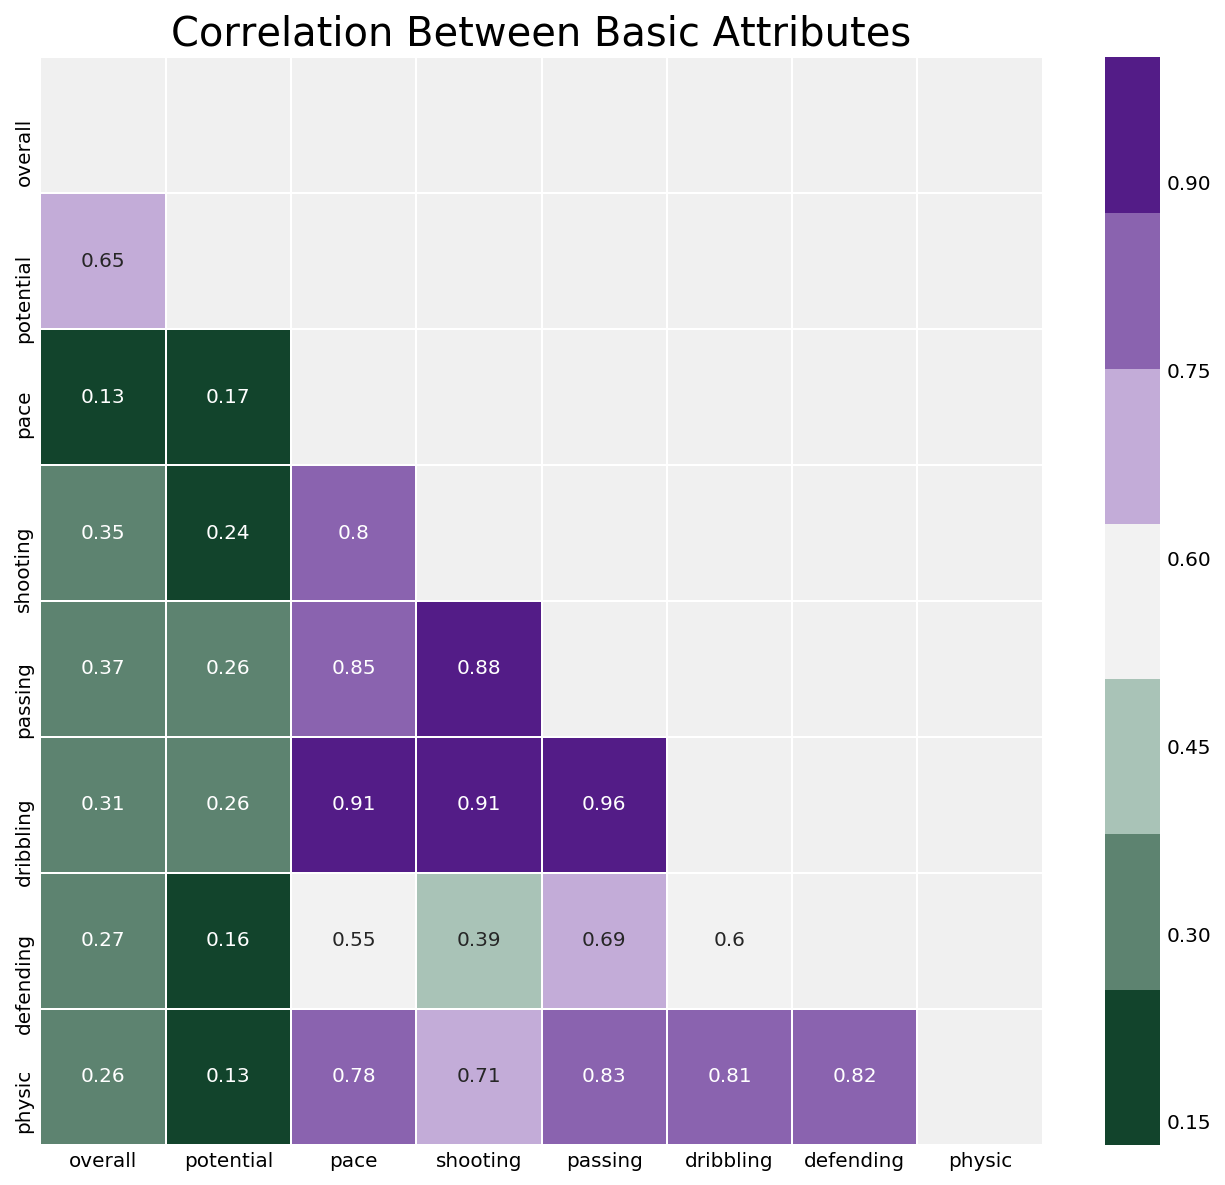

In [115]:
# correlation between basic attributes:

plt.figure(figsize=(10,10))
plt.subplots(figsize = (10,10))
plt.title("Correlation Between Basic Attributes", loc='center', fontsize = 20)

mask = np.zeros_like(fifa[basic_attr].corr())
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(145, 280, s=85, l=25, n=7)

ax = sns.heatmap(fifa[basic_attr].corr(), annot=True, linewidths=0.5, mask=mask, cmap=cmap)
ax.get_ylim
ax.set_ylim((8.0, 0.0))

Noteworthy observations:

1) It's intuitive that `potential` is the feature most highly correlated with `overall`, since the former is derivative of the latter.
- Every other basic attribute feature seems to have a mild to moderate correlation with `overall`, however, `pace` has the weakest correlation out of all other features.
    - This might indicate that football places much more emphasis on the technical aspects of the game, rather than the physical aspects. This might sound pretty straightforward (as with most other sports), but I would reckon that if I were to perform the same correlation plot 10 or 20 years ago (assuming the data is available), the correlation score for `pace` (and even `physic`, which has the next lowest correlation score with `overall`) might be much higher.
        - There has already been an observable transition in pattern of play from 20 years ago till present. Over the past 10 years or so, ever since the explosion of 'tiki-taka' spearheaded by FC Barcelona and Spain (who have won unprecedented championships with their style of play), there has been more emphasis on ball possession and ball retention, along with the rise of dimunitive, skillful players. Whereas few decades ago, the common themes in championship-winning teams were strength, pace, physicality and aggression, along with "long-ball" direct tactics.

(30, 0.0)

<Figure size 1440x1440 with 0 Axes>

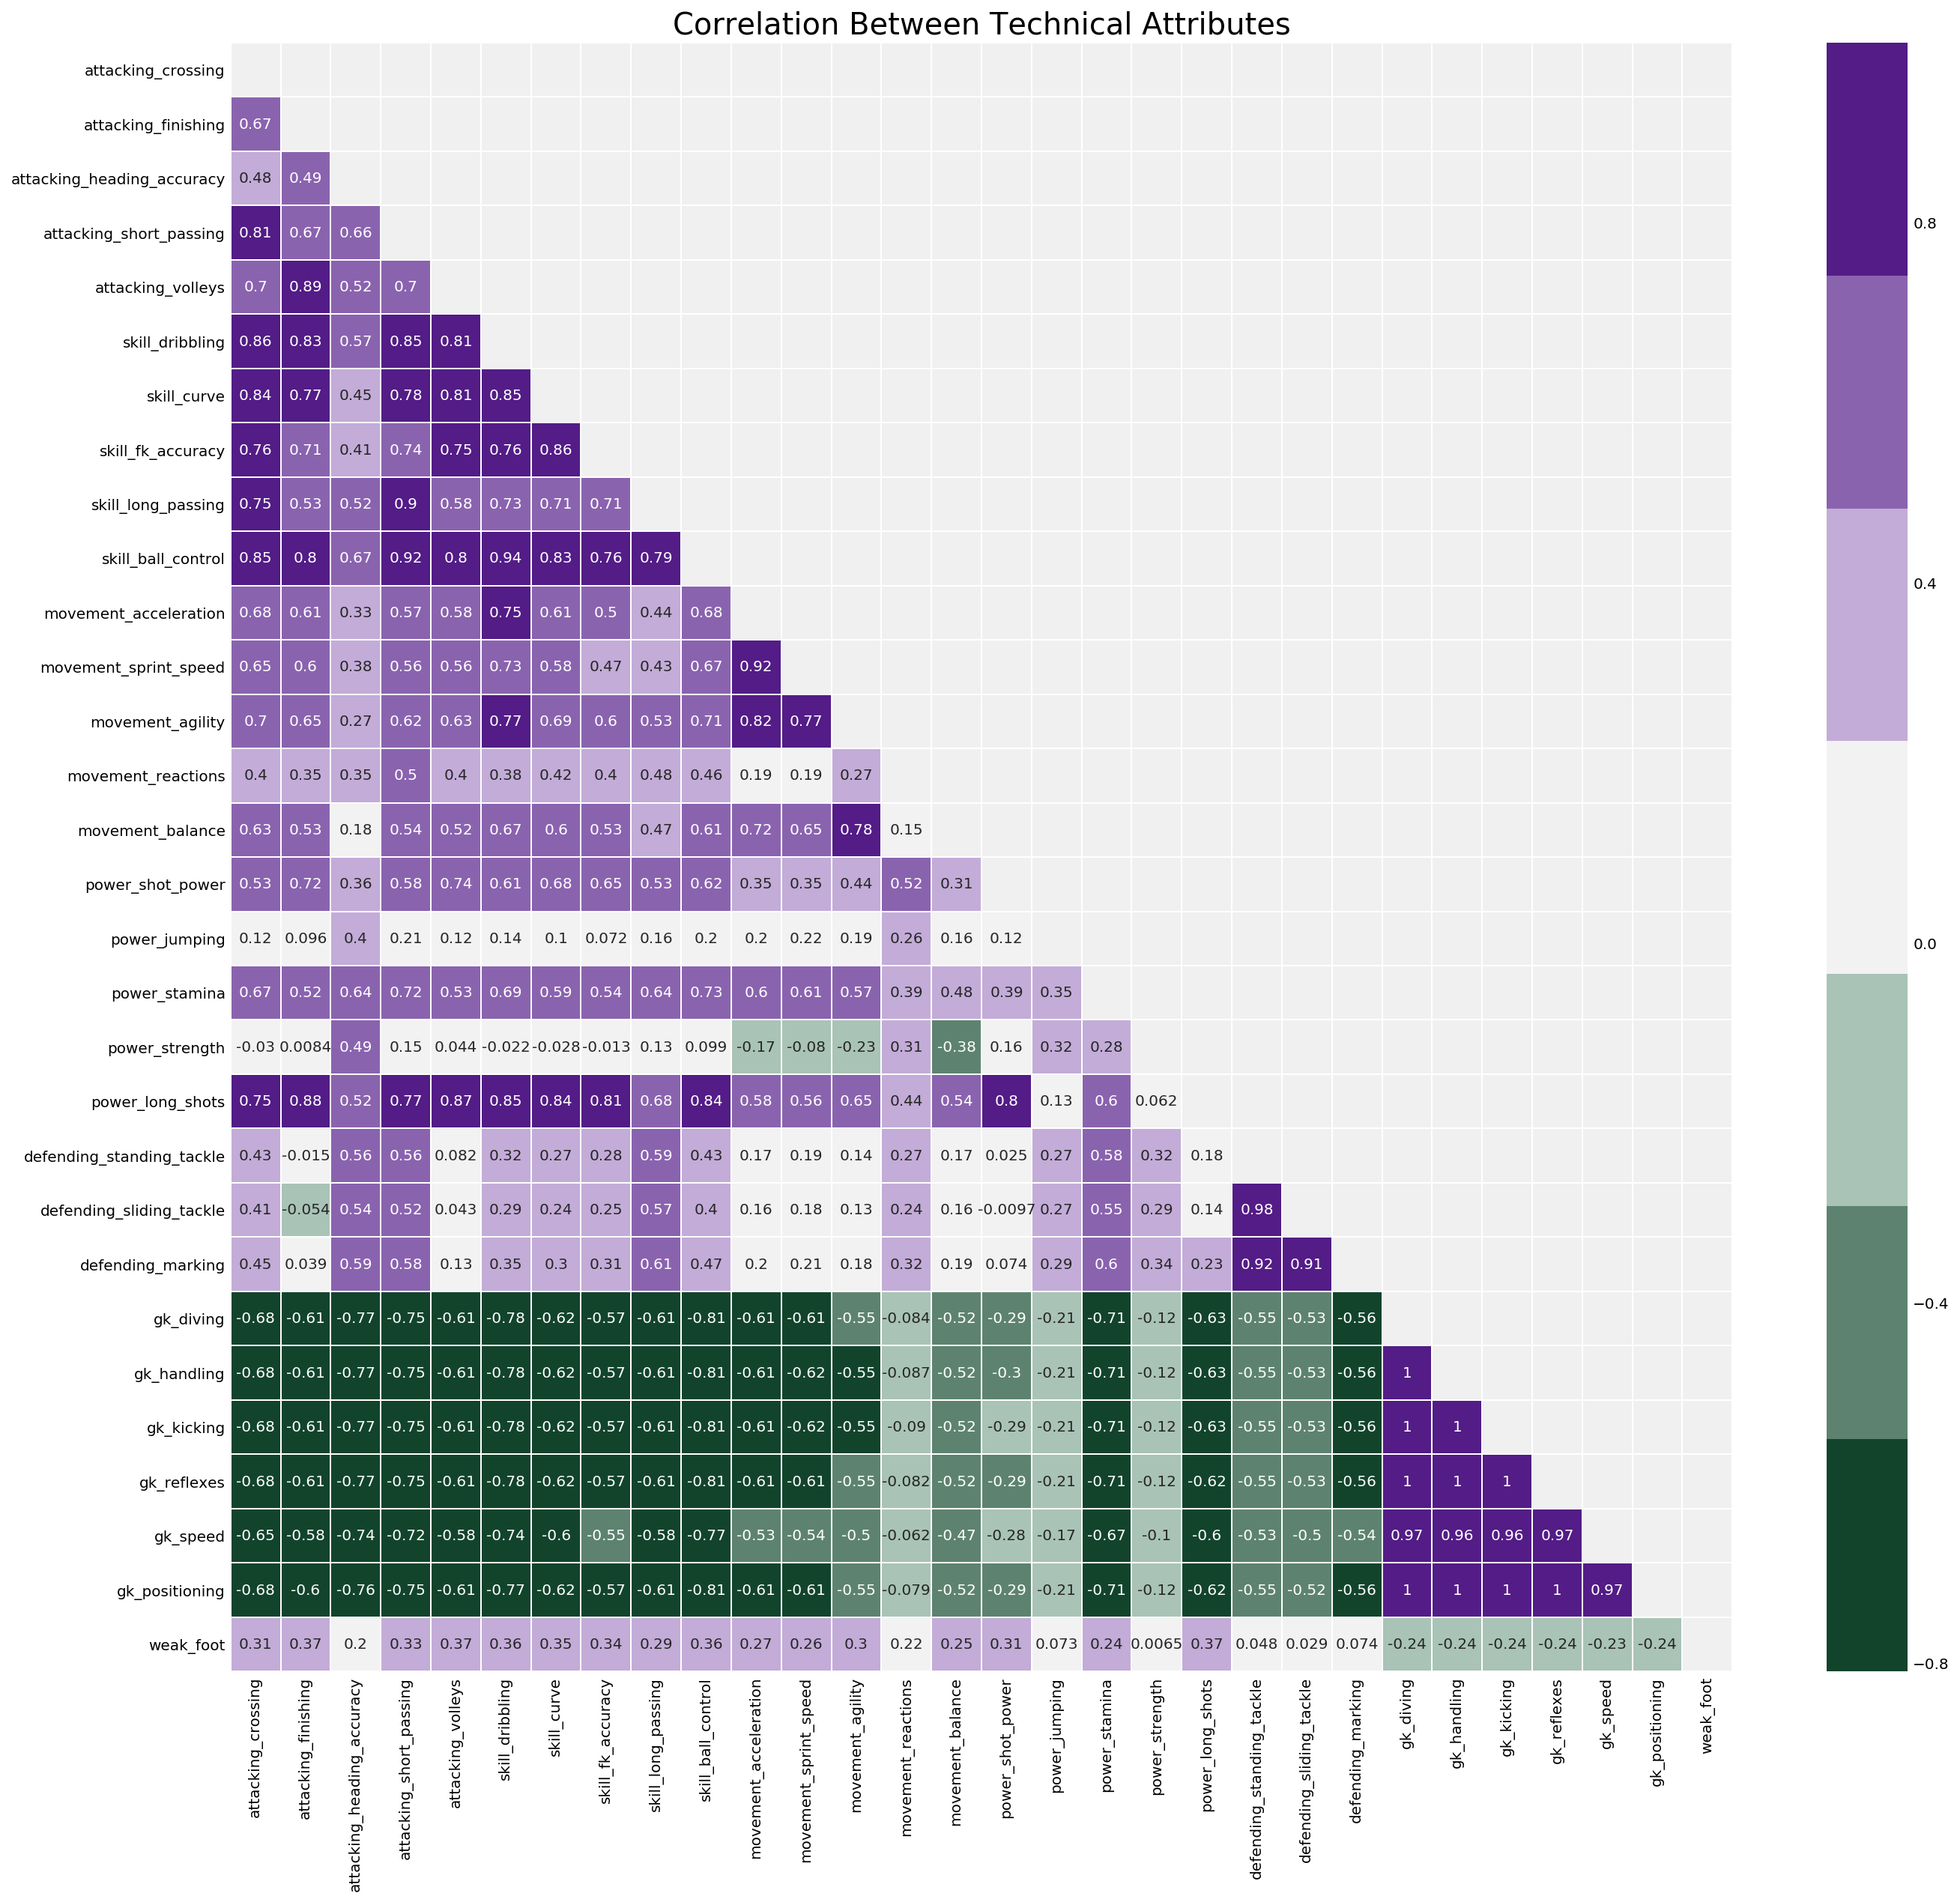

In [116]:
# correlation between technical attributes:

plt.figure(figsize=(20,20))
plt.subplots(figsize = (20,20))
plt.title("Correlation Between Technical Attributes", loc='center', fontsize = 20)

mask = np.zeros_like(fifa[technical_attr].corr())
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(145, 280, s=85, l=25, n=7)

ax = sns.heatmap(fifa[technical_attr].corr(), annot=True, linewidths=0.5, mask=mask, cmap=cmap)
ax.get_ylim
ax.set_ylim((len(technical_attr), 0.0))

Noteworthy observations:

1) Goalkeeper is a very specialised position, so it's not at all surprising to see all the goalkeeping attributes to be negatively correlated with all other non-goalkeeping attributes, as well as to be highly, almost-perfectly correlated with themselves.

Hence, plot another correlation heatmap without the goalkeeping attributes for a better look:

(24, 0.0)

<Figure size 1080x1080 with 0 Axes>

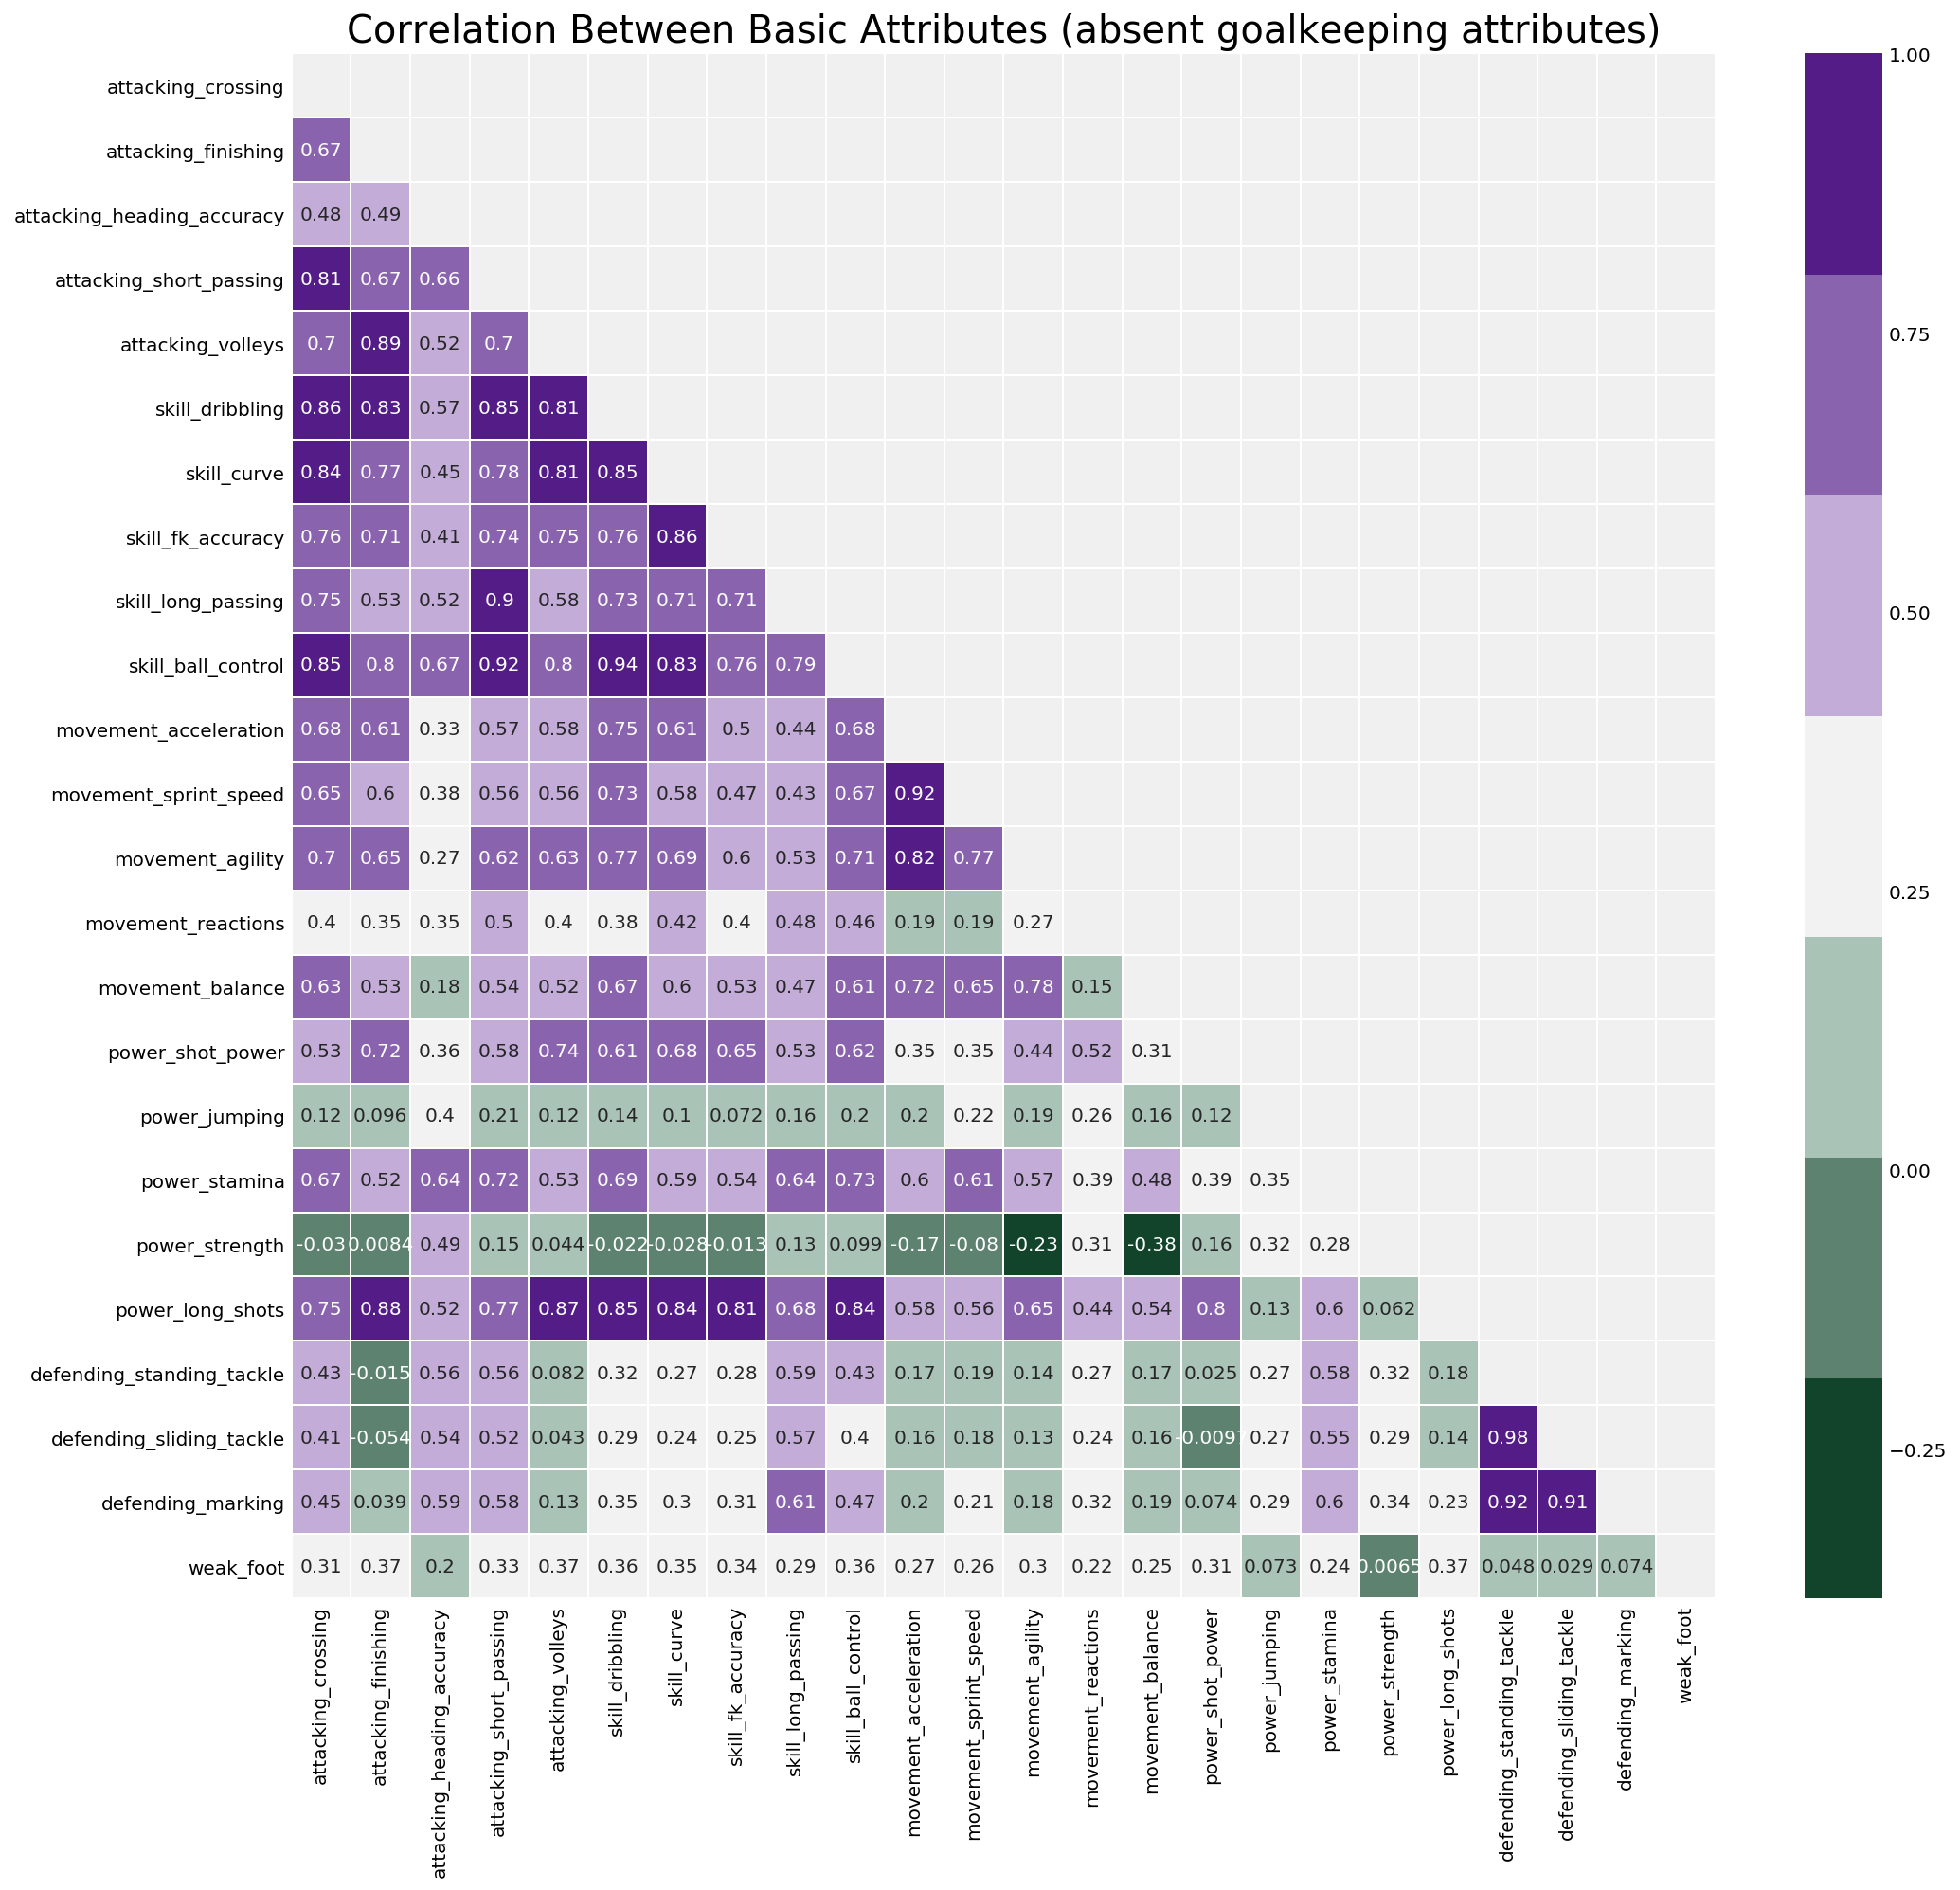

In [117]:
tech_attr_noGK = attack_attr + skill_attr + movement_attr + power_attr + defend_attr
tech_attr_noGK.append('weak_foot')

plt.figure(figsize=(15,15))
plt.subplots(figsize = (15,15))
plt.title("Correlation Between Basic Attributes (absent goalkeeping attributes)", loc='center', fontsize = 20)

mask = np.zeros_like(fifa[tech_attr_noGK].corr())
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(145, 280, s=85, l=25, n=7)

ax = sns.heatmap(fifa[tech_attr_noGK].corr(), annot=True, linewidths=0.5, mask=mask, cmap=cmap)
ax.get_ylim
ax.set_ylim((len(tech_attr_noGK), 0.0))

Noteworthy observations:

The power attributes were the most interesting to note.

1) Save for `attacking_heading_accuracy` and the other power attributes, **`power_jumping`** seems to have no strong correlation scores with other technical attributes. The higher score with heading accuracy makes sense, since most players jump to head a ball, and heading accuracy is best achieved through timing the jump and of course, jumping high enough so that other defenders or the goalkeeper cannot get to you.

    - It seems that jumping ability is a very "unique" skillset to possess, that it can't be improved by training other attributes (an alternative example would be training one's dribbling would lead to an improvement in one's balance as well, as indicated by the moderately high correlation score between `movement_balance` and `skill_dribbling` = 0.67).
    
    - Interestingly, the other higher correlation scores (after `attacking_heading_accuracy` and other power attributes) were all the defensive attributes. Perhaps this fits into the notion that good defenders need to be powerful and physical, since there are a lot of physical battles and jostling against the opponent's attackers.
    
        - Upon closer obervation of the defensive attributes' correlation scores, indeed, all of them have moderate to high correlation scores with power attributes, except for `power_shot_power` and `power_long_shots`.
        
2) Likewise, **`power_strength`** is mostly weakly-correlated with the technical attributes, save for (once again) `attacking_heading_accuracy` and the defensive attributes (as well as the other power attributes).

    - Also observed is the moderate negative correlations with `movement_agilty` and `movement_balance`, suggesting that, intuitively, the stronger and more bulked-up you are, the less agile and well-balanced you become.
    
3) **`attacking_short_passing`** has mostly moderate to high correlation scores with the other technical attributes (ignoring the special cases of `power_jumping` and `power_strength`). Except for its correlation score of 0.33 with `weak_foot`, all its other scores with the other technical attributes range from 0.5 to 0.9.

    - This suggests that short passing is perhaps an extremely important attribute by most professional soccer players nowadays. This makes perfect sense, as the most common tenets of football is to pass; while one has to shoot to score a goal, one has to first get close enough to the opponent's goal, and that is achieved through the basic principle of passing to teammates. Hence, improving on passing skills would generally help to alleviate one's all-round gameplay. To put it in another way, if a player can't even achieve proficiency in the simple act of a short pass, it's hard to imagine him/her performing decently in other aspects of the sport.
    
    - Relating back to the above explanation of football evolving to a more possession-based game, one can imagine how important the skillset of passing is nowadays in modern football. Likewise, I would hypothesise that, given the same dataset more than 10 or 20 years ago, perhaps short passing wouldn't have such a high correlation scores with other attributes. Maybe `skill_long_passing` will be the feature that has the most high correlation scores with other attributes.

(26, 0.0)

<Figure size 1440x1440 with 0 Axes>

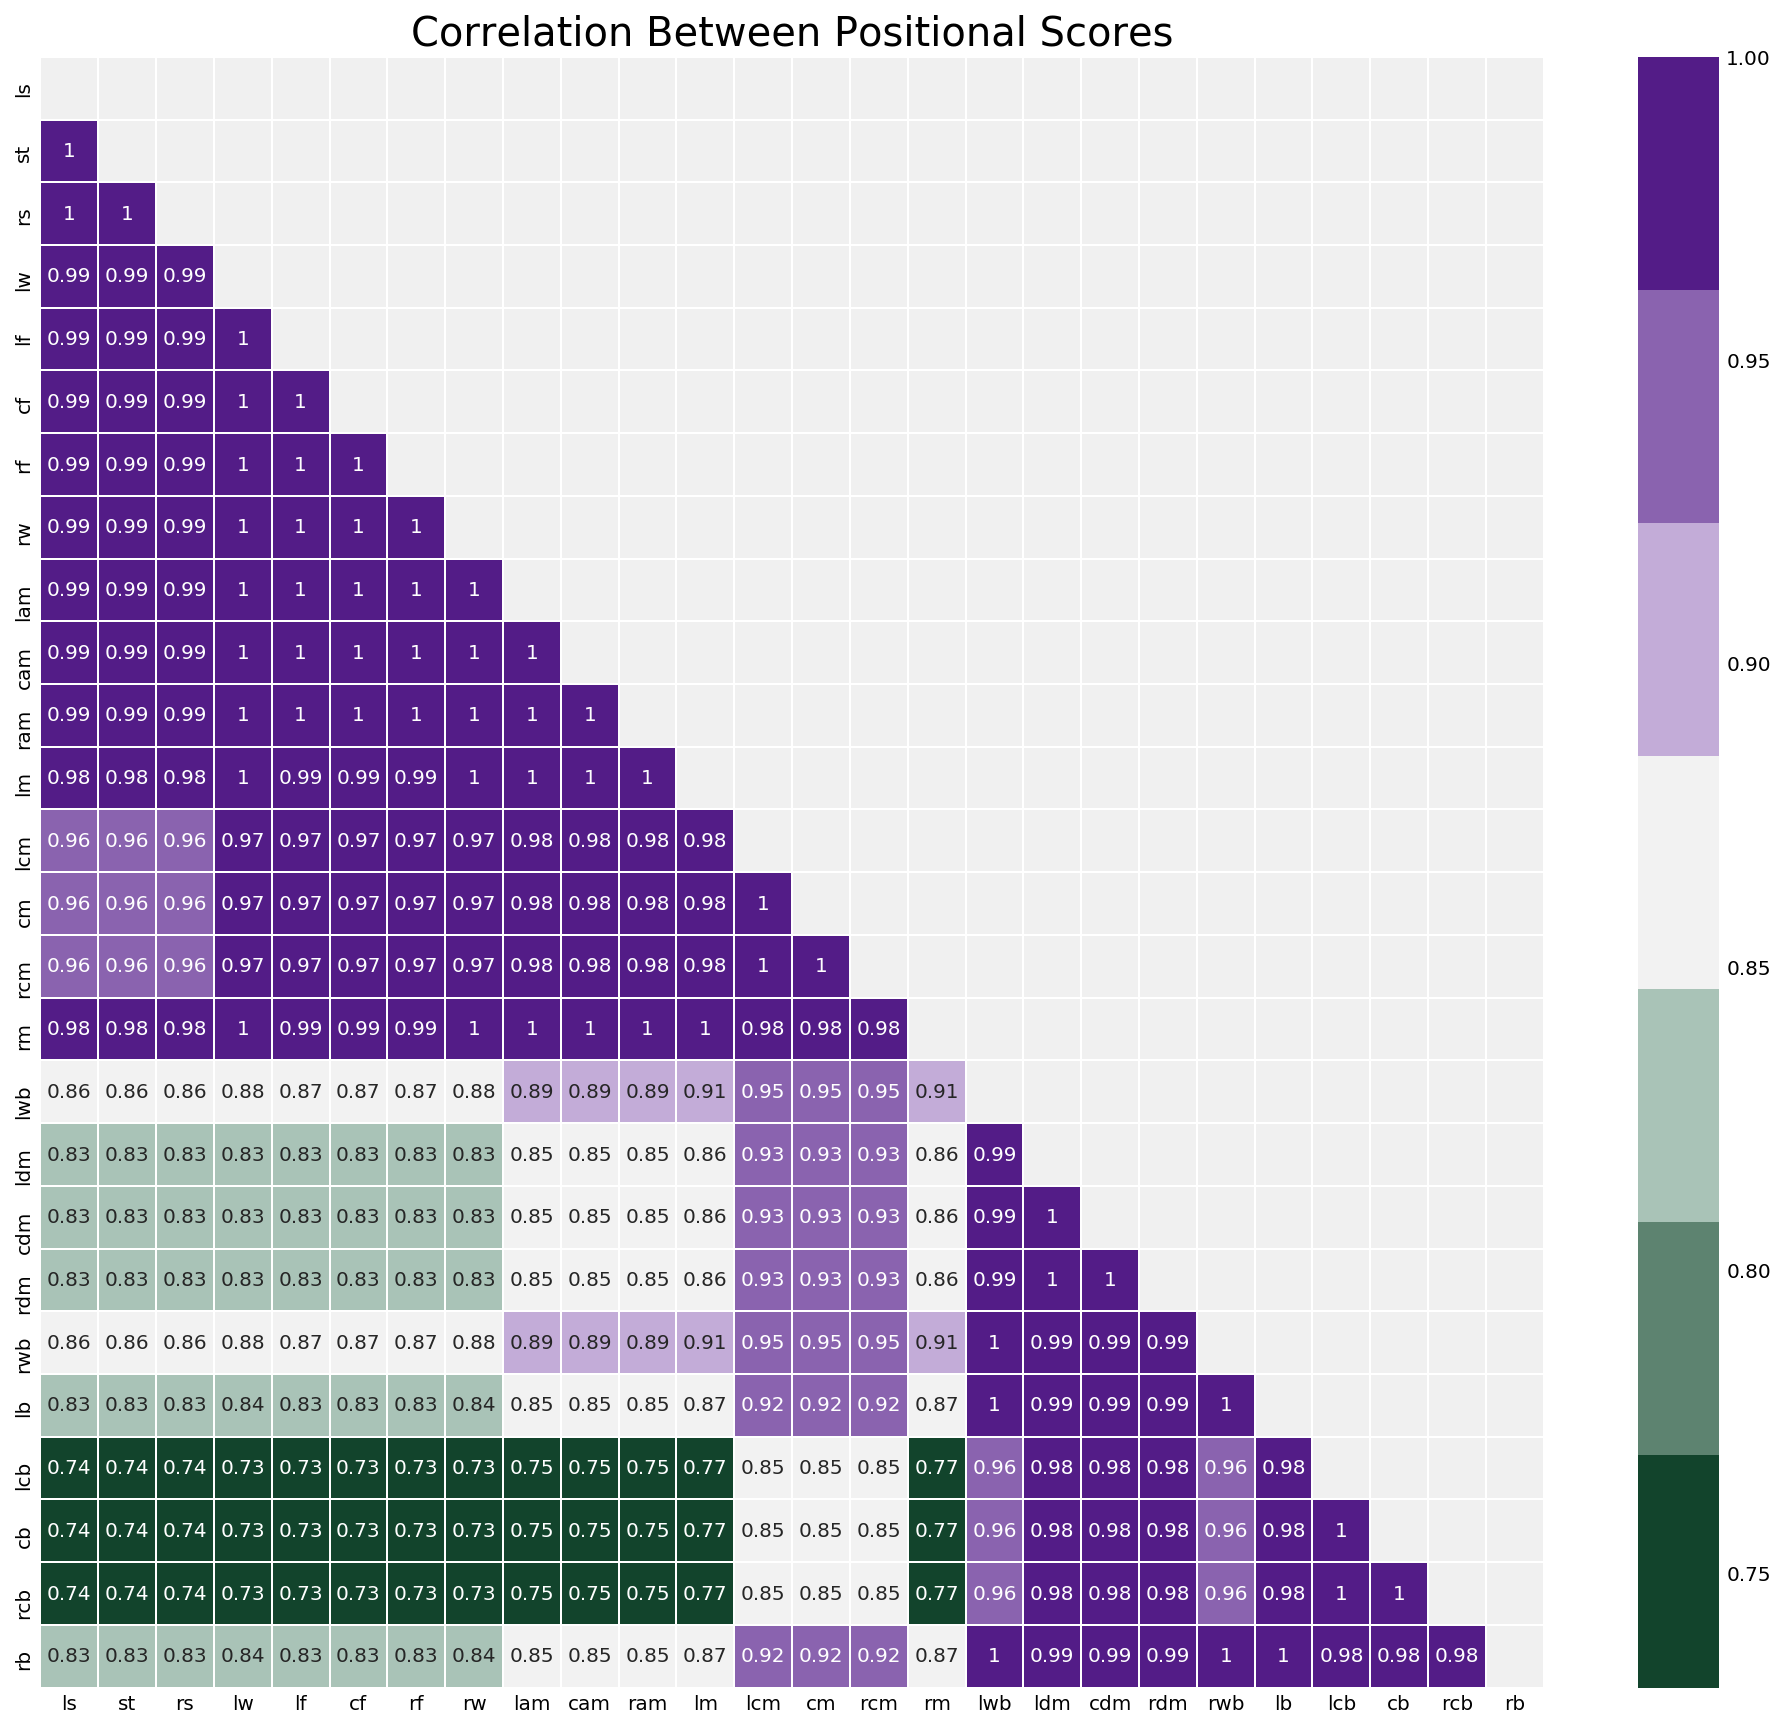

In [118]:
# correlation between positional scores:

plt.figure(figsize=(20,20))
plt.subplots(figsize = (15,15))
plt.title("Correlation Between Positional Scores", loc='center', fontsize = 20)

mask = np.zeros_like(fifa[pos_scores].corr())
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(145, 280, s=85, l=25, n=7)

ax = sns.heatmap(fifa[pos_scores].corr(), annot=True, linewidths=0.5, mask=mask, cmap=cmap)
ax.get_ylim
ax.set_ylim((len(pos_scores), 0.0))

Generally speaking, all the correlation scores are at least moderately higher (> 0.7). But on a relative scale, it can be seen that the correlation scores vary in terms of offensive positions and defensive positions. This is most apparent when looking at the correlation scores for the center-back positions, lcb/cb/rcb. These positions are almost exclusively pure defensive positions, which explain why their correlation scores with any offensive positions are the lowest.

On a more general level, from top of the map to the bottom (or from the right of the map to the left), one can see the correlation scores decrease as the positions transition from very offensive to very defensive.

In [119]:
# correlation between work rates:

fifa[att_def_rate].corr()

attack_work_rate  defense_work_rate
attack_work_rate           1.000000          -0.085947
defense_work_rate         -0.085947           1.000000

A player's attacking work rate seems to have almost no correlation wth his defensive work rate.

(6, 0.0)

<Figure size 576x576 with 0 Axes>

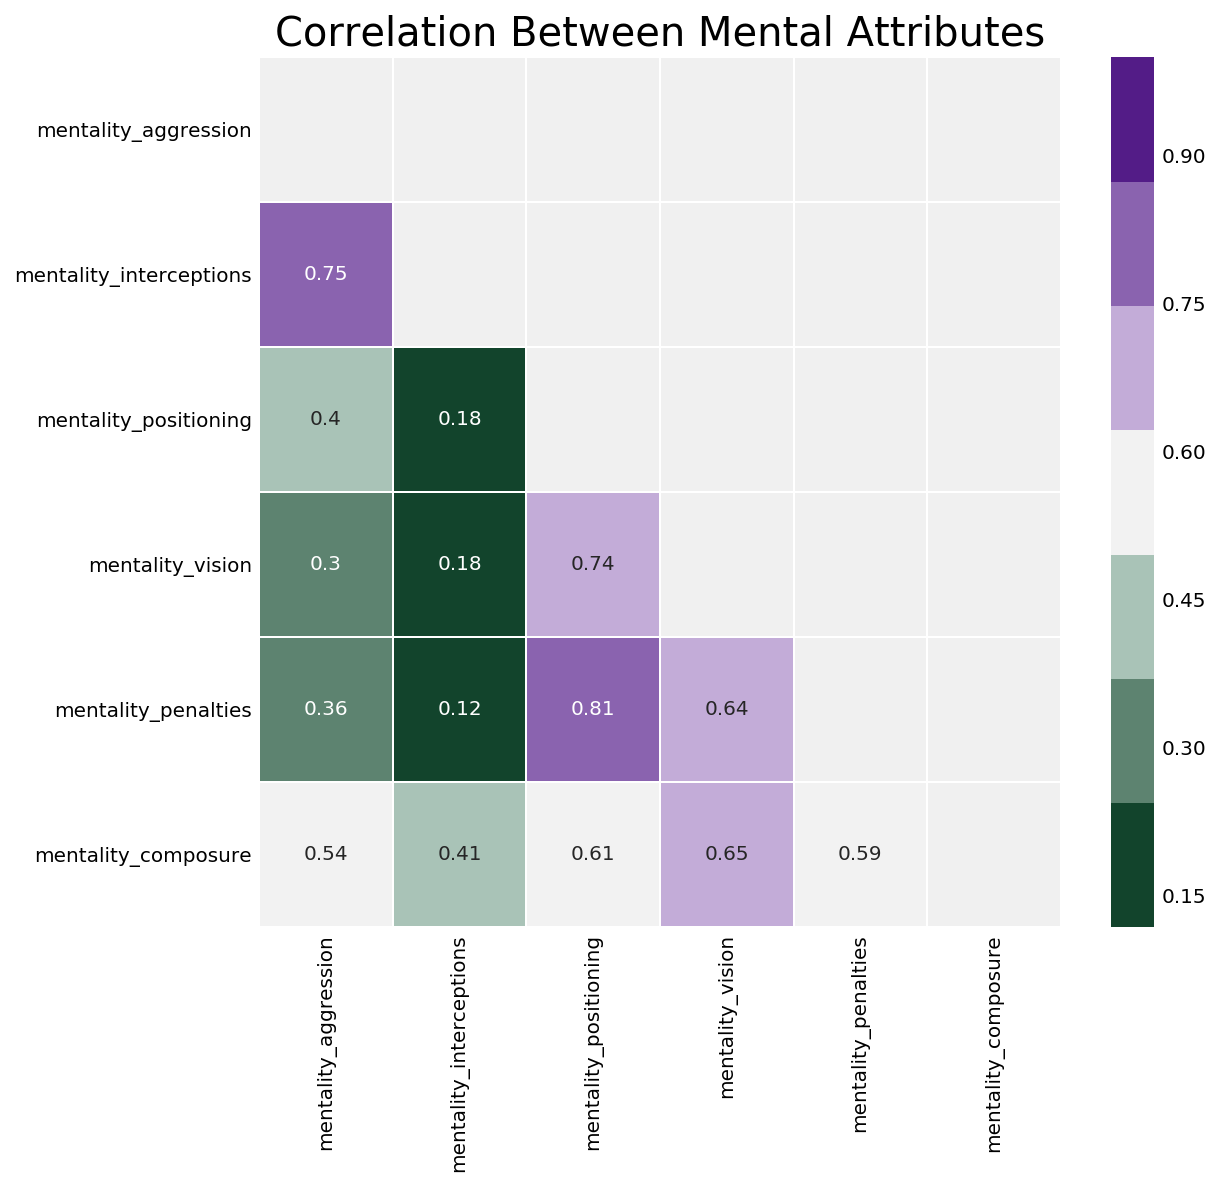

In [120]:
plt.figure(figsize=(8,8))
plt.subplots(figsize = (8,8))
plt.title("Correlation Between Mental Attributes", loc='center', fontsize = 20)

mask = np.zeros_like(fifa[mental_attr].corr())
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(145, 280, s=85, l=25, n=7)

ax = sns.heatmap(fifa[mental_attr].corr(), annot=True, linewidths=0.5, mask=mask, cmap=cmap)
ax.get_ylim
ax.set_ylim((len(mental_attr), 0.0))

Noteworthy observations:
    
1) `mentality_vision` has a very high correlation score with `mentality_positioning`, which makes sense given that with great positioning and awareness comes an increased capacity to make a successful pass (or not - decision-making is a key component of football awareness).

2) `mentality_aggression` and `mentality_interceptions` are highly correlated as well, illustrating that a player's will and determination to win the game (and hence, get the ball back when possession is lost) greatly affects his ability to intercept passes.

#### Distribution Plots

In [121]:
print(positions)
print(other_var)

['player_positions', 'team_position']
['short_name', 'long_name', 'age', 'club', 'nationality', 'work_rate', 'preferred_foot', 'value_eur', 'wage_eur', 'release_clause_eur', 'player_tags', 'player_traits', 'contract_valid_until']


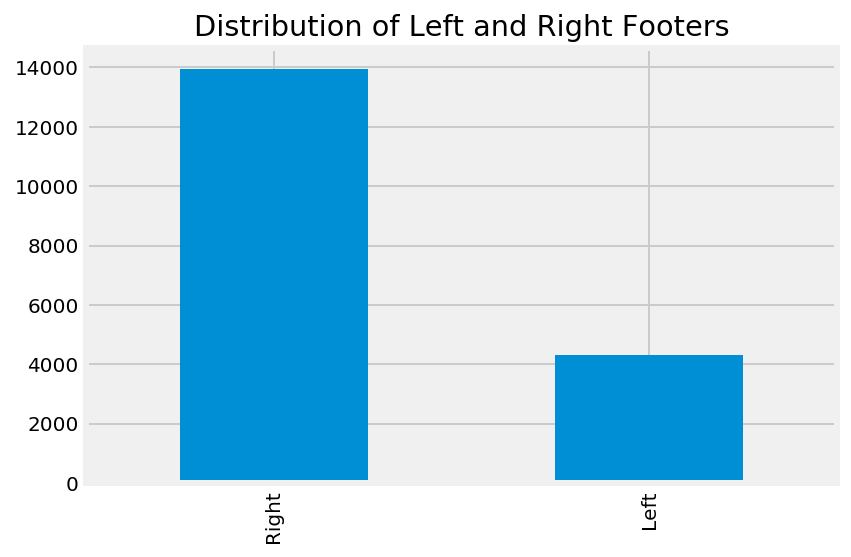

In [122]:
# distribution plot of left vs right footers:

plt.title('Distribution of Left and Right Footers', loc='center')

fifa.preferred_foot.value_counts().plot(kind='bar')

It seems like there is a significantly higher proportion of right-footed professional soccer players (as with the general real world population).

In [123]:
fifa.player_positions.unique()

array(['RW, CF, ST', 'ST, LW', 'LW, CAM', 'GK', 'LW, CF', 'CAM, CM', 'CB',
       'CM', 'RW, ST', 'ST, RW', 'ST', 'CDM, CM', 'CF, ST, LW', 'CAM, RW',
       'CM, CDM', 'RW, LW', 'CAM, LM, ST', 'ST, LM', 'LW, LM', 'CB, LB',
       'RW, CAM, CM', 'CDM', 'CF, LM', 'CF, ST', 'LB', 'CM, CAM, CDM',
       'CF, LW, ST', 'LW', 'CB, CDM', 'RB, CM, CDM', 'CAM, CM, LW',
       'CF, ST, CAM', 'LW, CM', 'CAM, RM, RW', 'CM, CAM', 'CM, LM, RM',
       'LB, CB', 'RB', 'CAM, CF, ST', 'RW, LW, ST', 'LB, LM',
       'RM, LM, CM', 'CAM, CM, RM', 'RM, LM', 'CAM, RM', 'CF, LW, CAM',
       'CAM, LM, RM', 'LM, RM, LW', 'RM, LM, LW', 'CAM', 'CAM, CM, CF',
       'LM', 'CDM, CB', 'RB, CB', 'RM, RW', 'LM, RW, LW', 'RM, CM',
       'CAM, LW, ST', 'RW, RM', 'CM, CDM, CAM', 'CM, CAM, CF',
       'LW, ST, LM', 'LM, ST', 'RM, RW, ST', 'LM, CAM, RM', 'LW, RW',
       'CF, LM, LW', 'RM, CAM', 'CF, RM, LM', 'RW, LW, CAM',
       'CDM, CM, CAM', 'CDM, CB, LB', 'ST, CAM, LW', 'ST, CF', 'RW, CAM',
       'LW, LM, RW', 'RW

In [124]:
fifa.team_position.unique()

array(['RW', 'LW', 'CAM', 'GK', 'RCM', 'LCB', 'ST', 'CDM', 'LDM', 'RM',
       'RCB', 'LCM', 'LM', 'CF', 'SUB', 'LB', 'LS', 'RB', 'RDM', 'RES',
       'RAM', 'RS', 'RF', 'CM', 'CB', 'LF', 'LAM', nan, 'RWB', 'LWB'],
      dtype=object)

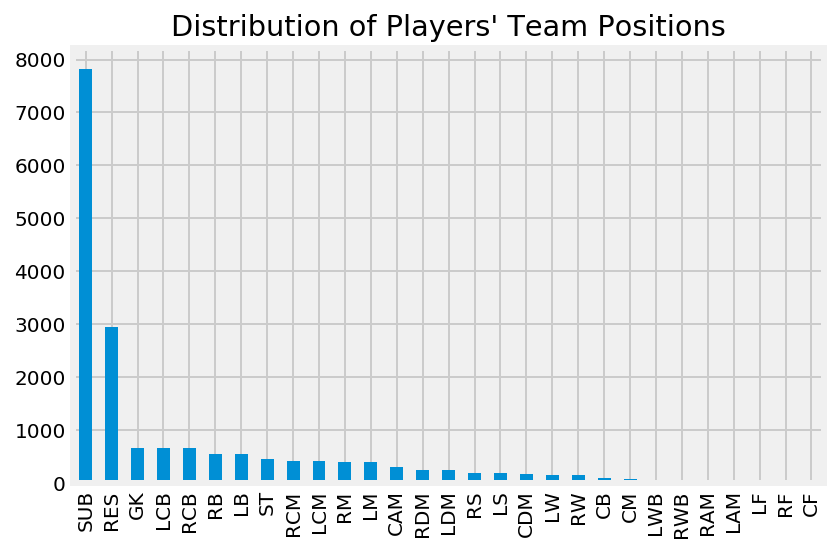

In [125]:
# distribution plot of team positions:

plt.title("Distribution of Players' Team Positions", loc='center')

fifa.team_position.value_counts().plot(kind="bar")

There are many more substitutes and reserves than other team positions, which makes sense given that any team can only field 11 outfield players.

Amongst the other outfield positions, it seems that purely-offensive positions such as RF/LF/CF/LAM/RAM are much lesser than other positions, suggesting offensive players might be more rare. However, one must take note that a player's position in the team is also dictated by the team's tactics and formation.

- E.g. to be able play as a RF/LF/CF, usually the player is in a team where the formation is 4-3-3, a highly-offensive and technical advanced formation. Hence, there are only that handful of teams in the world that can utilize this formation, resulting in lower frequency of such positions.

Also, some of these position names are more general than others - a player that plays striker (ST) can very likely also play LF/RF/CF (left forward/right forward/center forward), the same goes for CAM (central attacking midfielder) vs RAM/LAM (right/left attacking midfielder), etc.

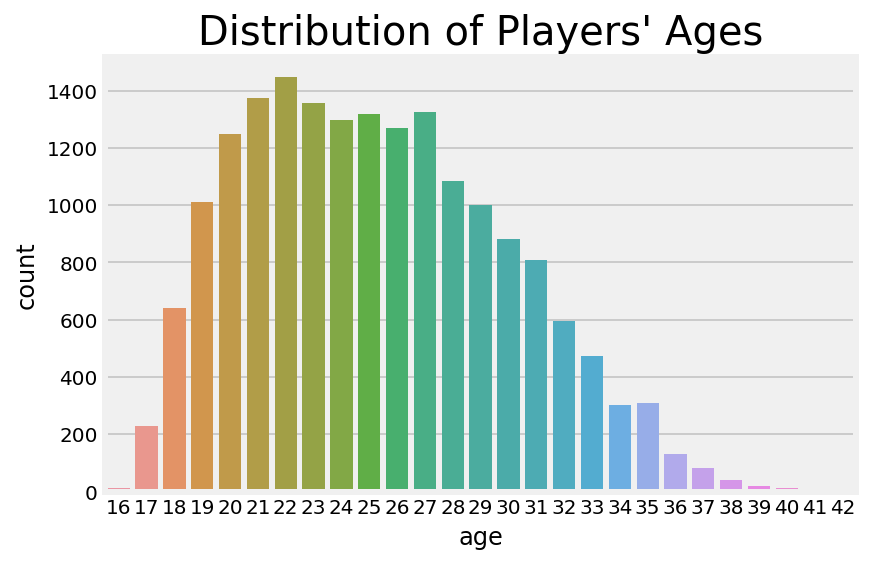

In [126]:
# distribution plot of players' ages:

plt.title("Distribution of Players' Ages", loc='center', fontsize = 20)

sns.countplot(x= "age", data=fifa)

The bulk of the players are aged between 18 to 33, and the plot above illustrates that `age` is right-skewed.

Professional football is an extremely intensive contact sport, with matches being played week-in week-out, sometimes more than 1 match per week for team competing in multiple championships. Hence, it is inevitable that injuries occur, and without proper recovery/conditioning, these can take their toll on the player's body over the years (sometimes, even with the proper conditioning and preventive measures, all it takes is some bad luck in the form a career-ending injury to put a fullstop to the player's career).

As such, the demands of professional football result in a rather short 'lifespan' of a pro player, as we can see from the sharp drop in player counts from age 27 onwards.

In [127]:
print(fifa.nationality.unique())
print(len(fifa.nationality.unique()))

['Argentina' 'Portugal' 'Brazil' 'Slovenia' 'Belgium' 'Germany'
 'Netherlands' 'Croatia' 'Egypt' 'France' 'Senegal' 'England' 'Spain'
 'Italy' 'Uruguay' 'Poland' 'Denmark' 'Gabon' 'Korea Republic'
 'Costa Rica' 'Slovakia' 'Bosnia Herzegovina' 'Serbia' 'Scotland'
 'Hungary' 'Switzerland' 'Greece' 'Austria' 'Morocco' 'Sweden' 'Wales'
 'Colombia' 'Czech Republic' 'Chile' 'Algeria' 'Ivory Coast' 'Togo'
 'Norway' 'Mexico' 'Iceland' 'Finland' 'Jamaica' 'Albania' 'Guinea'
 'Cameroon' 'Ghana' 'Montenegro' 'Ukraine' 'Russia' 'DR Congo'
 'Central African Rep.' 'Venezuela' 'Nigeria' 'Armenia' 'Israel' 'Ecuador'
 'Paraguay' 'Australia' 'Turkey' 'Romania' 'Japan' 'Mali' 'United States'
 'Kosovo' 'Dominican Republic' 'Tanzania' 'China PR' 'Northern Ireland'
 'Republic of Ireland' 'Tunisia' 'Cape Verde' 'FYR Macedonia'
 'Burkina Faso' 'Kenya' 'Angola' 'South Africa' 'Peru' 'Syria' 'Gambia'
 'New Zealand' 'Equatorial Guinea' 'Zimbabwe' 'Georgia' 'Canada' 'Estonia'
 'Benin' 'Bulgaria' 'Mozambique' 'Hon

<Figure size 1440x1440 with 0 Axes>

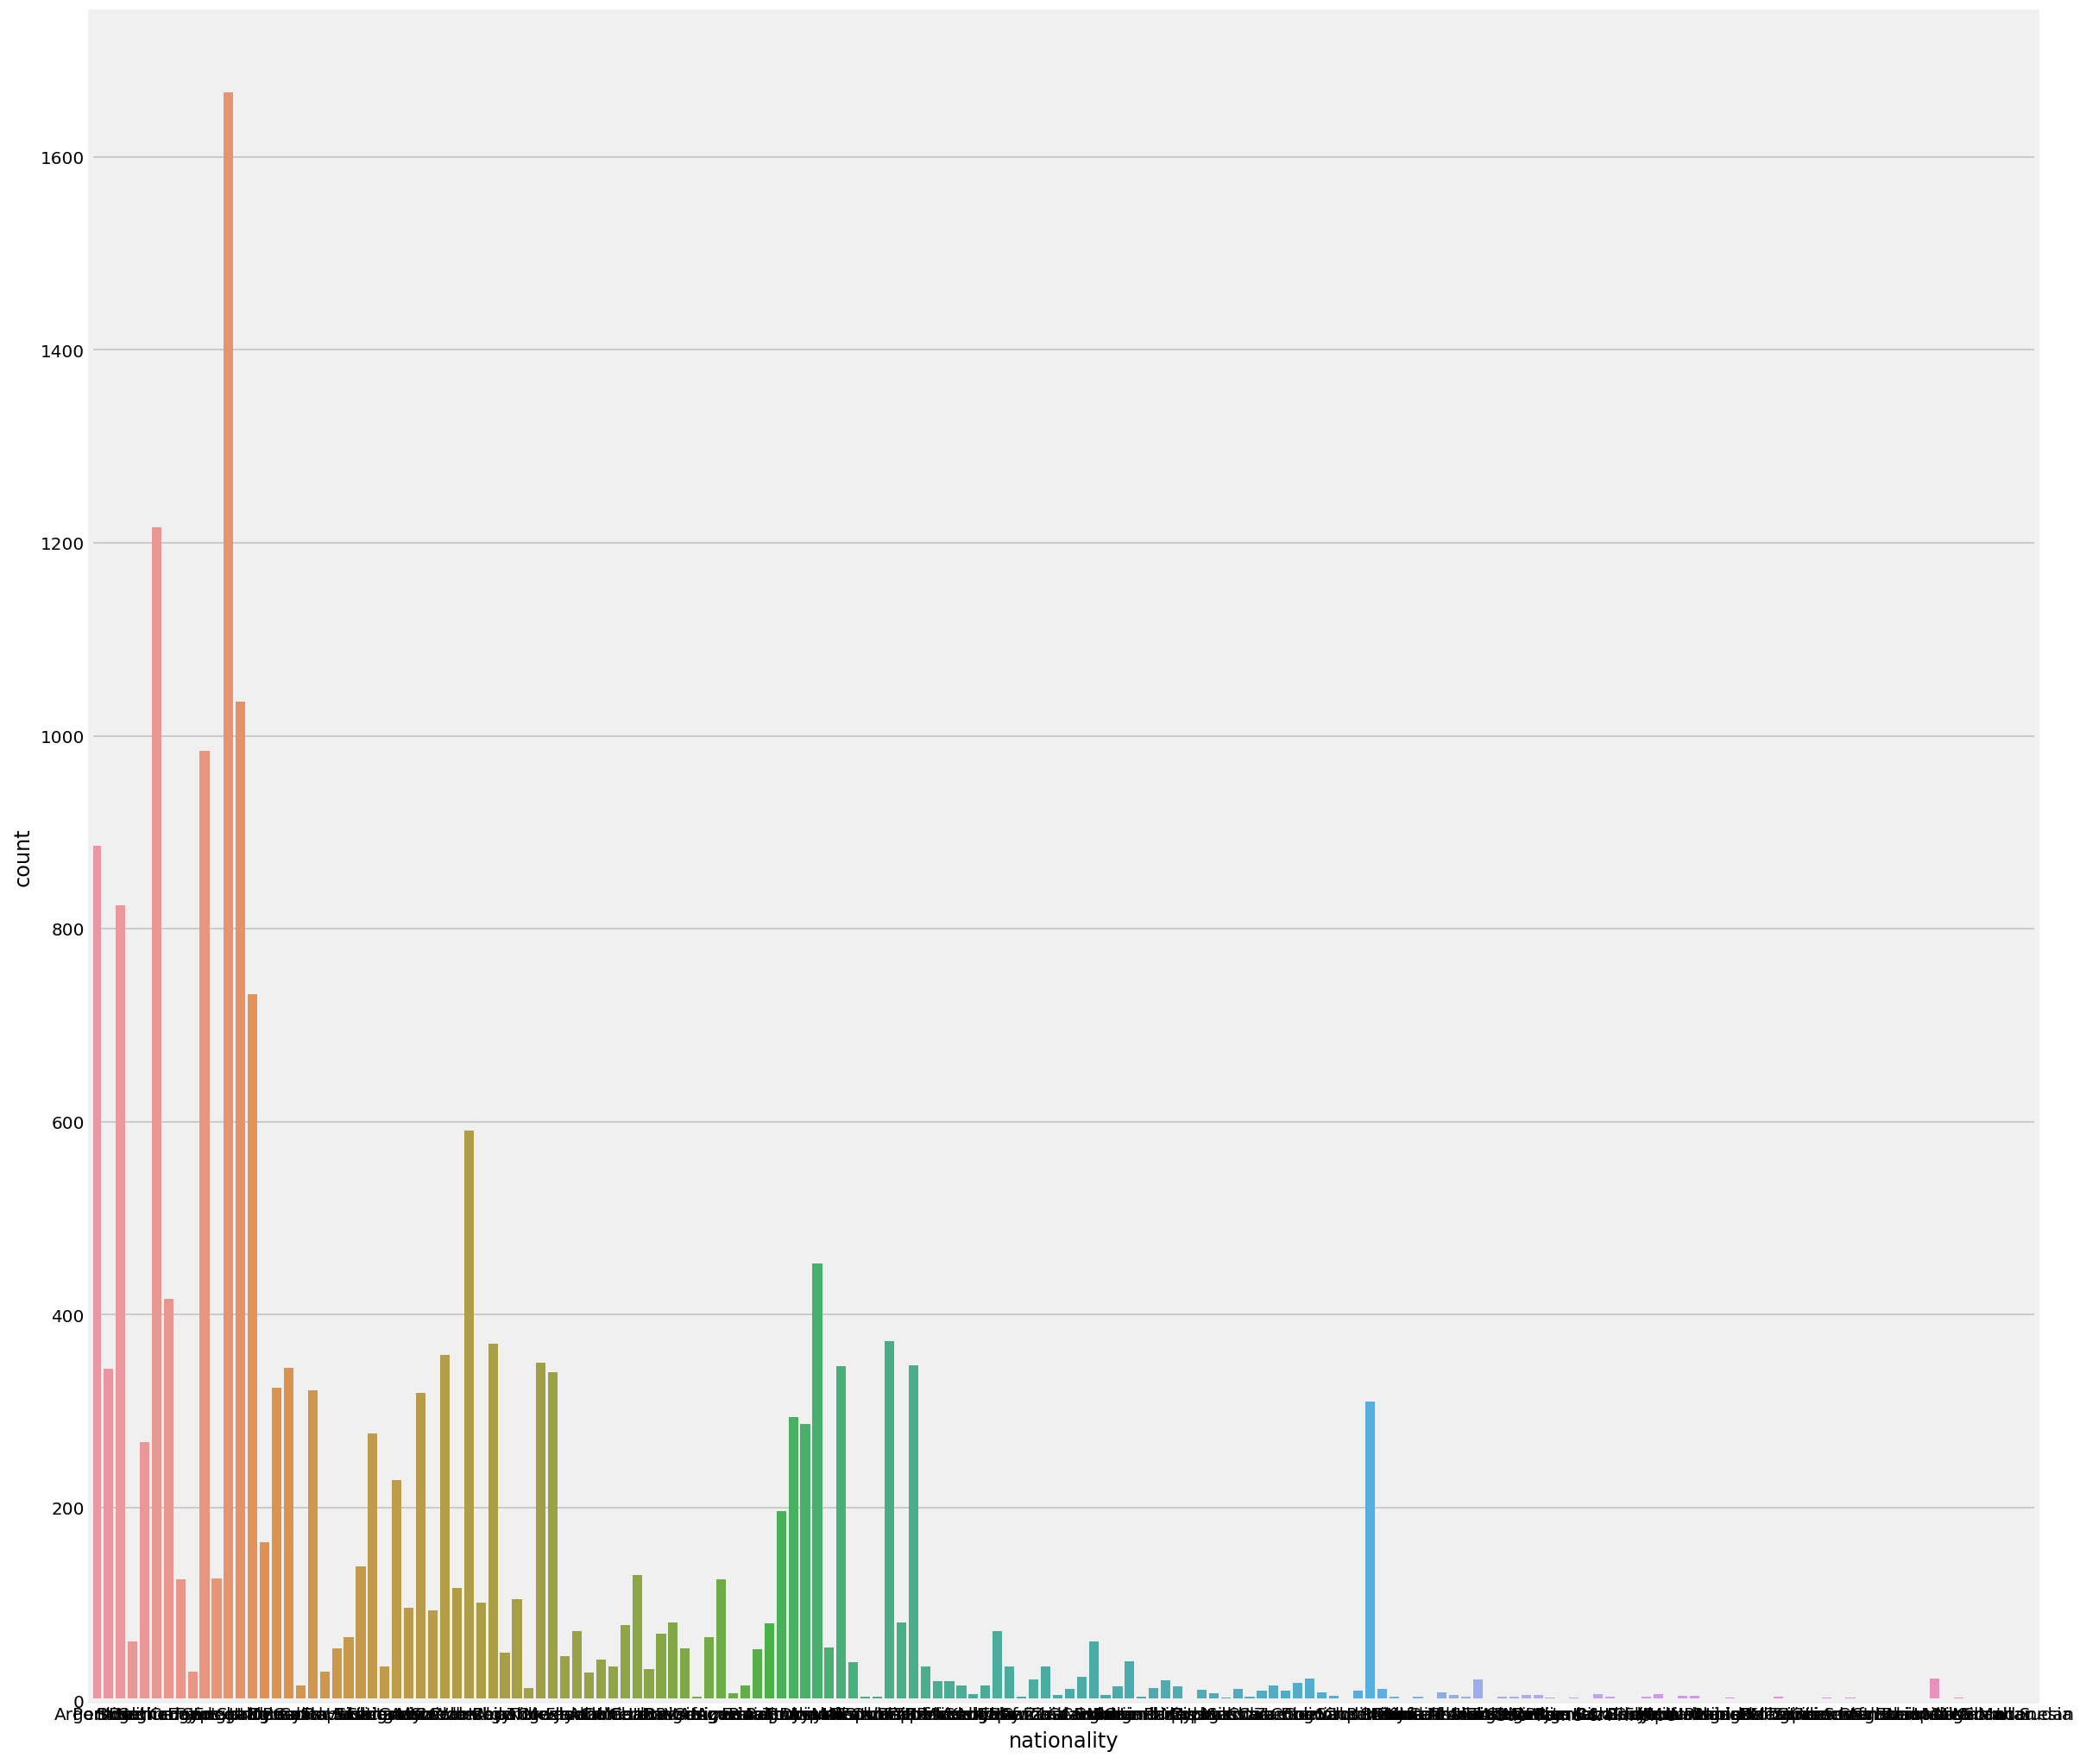

In [128]:
# distribution plot of players' nationalities:

plt.figure(figsize=(20,20))
plt.subplots(figsize = (18,18))

sns.countplot(x= "nationality", data=fifa)

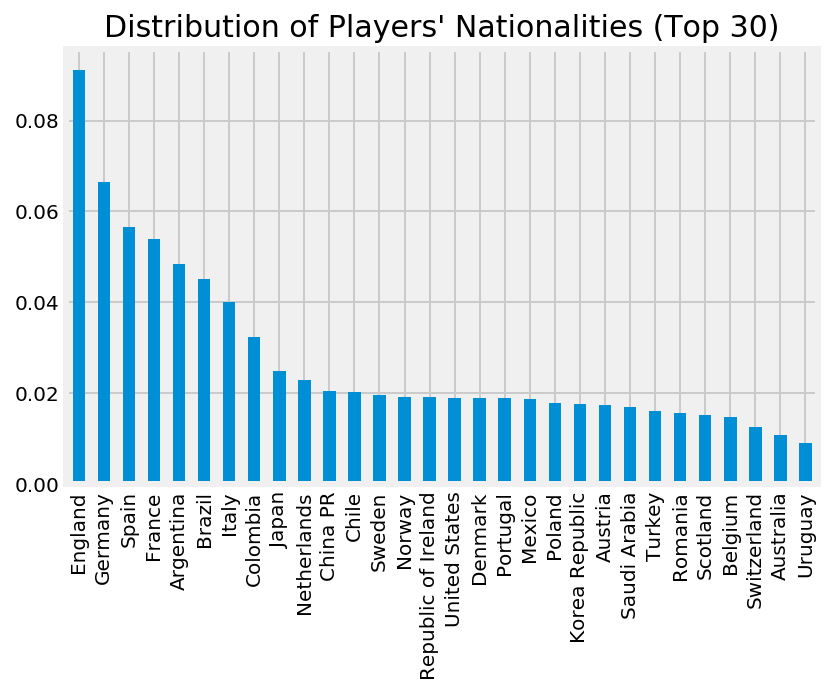

In [129]:
# above plot isn't too informative due to large number of nationalities, so focus on
# distribution plot of top 30 players' nationalities:

plt.title("Distribution of Players' Nationalities (Top 30)", loc='center', fontsize = 15)

fifa.nationality.value_counts(normalize=True).head(30).plot(kind="bar")

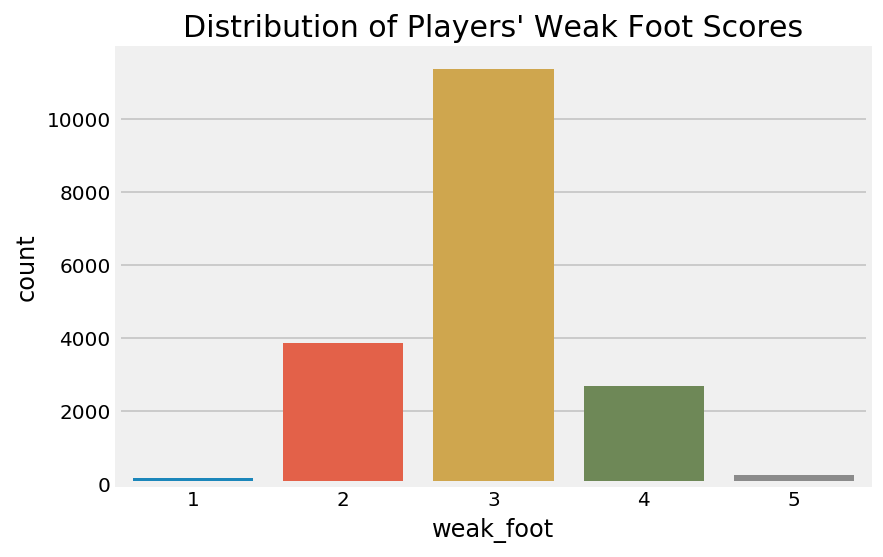

In [130]:
# distribution plot of weak foot scores:

plt.title("Distribution of Players' Weak Foot Scores", loc='center', fontsize = 15)

sns.countplot(x= "weak_foot", data=fifa)

Generally, most players have a moderate score of 3 of their weak foot, and the distribution is normal.

Distribution plots of `attack_work_rate`, followed by `defense_work_rate`:

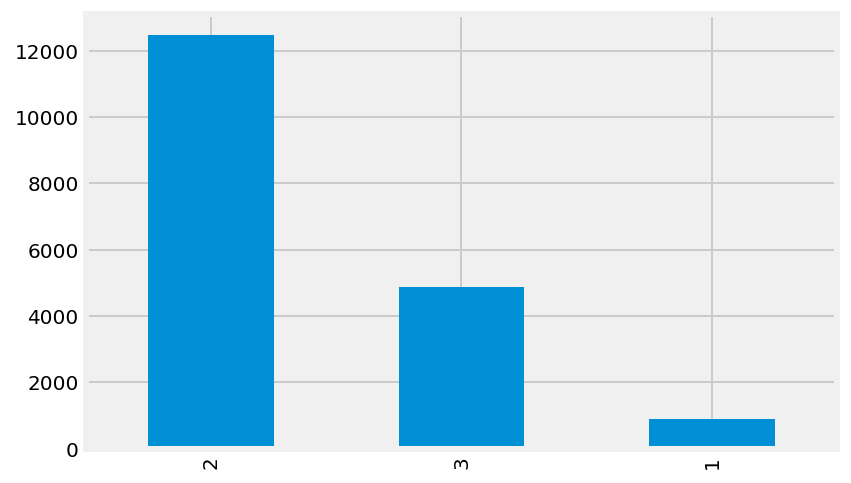

In [131]:
fifa.attack_work_rate.value_counts().plot(kind='bar')

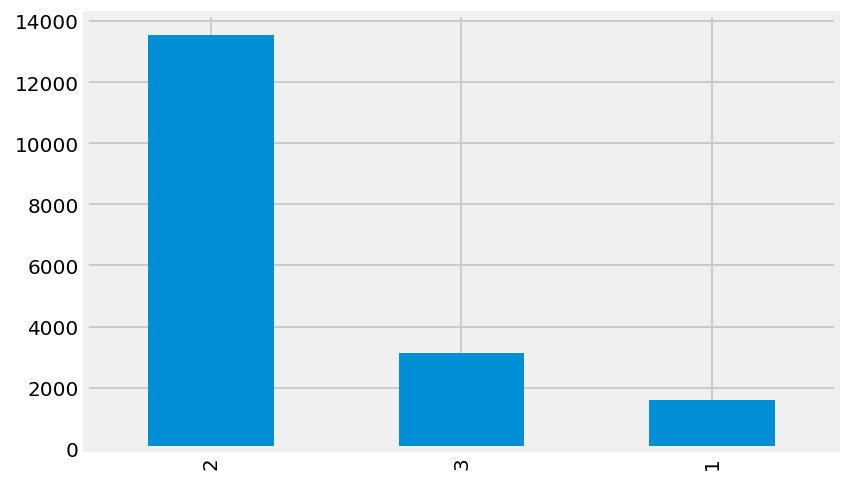

In [132]:
fifa.defense_work_rate.value_counts().plot(kind='bar')

Generally, most players have a moderate score of 2 (medium) in both attacking and defensive rates, and the distribution is largely normal.

### Regressional EDA Plots

<Figure size 720x720 with 0 Axes>

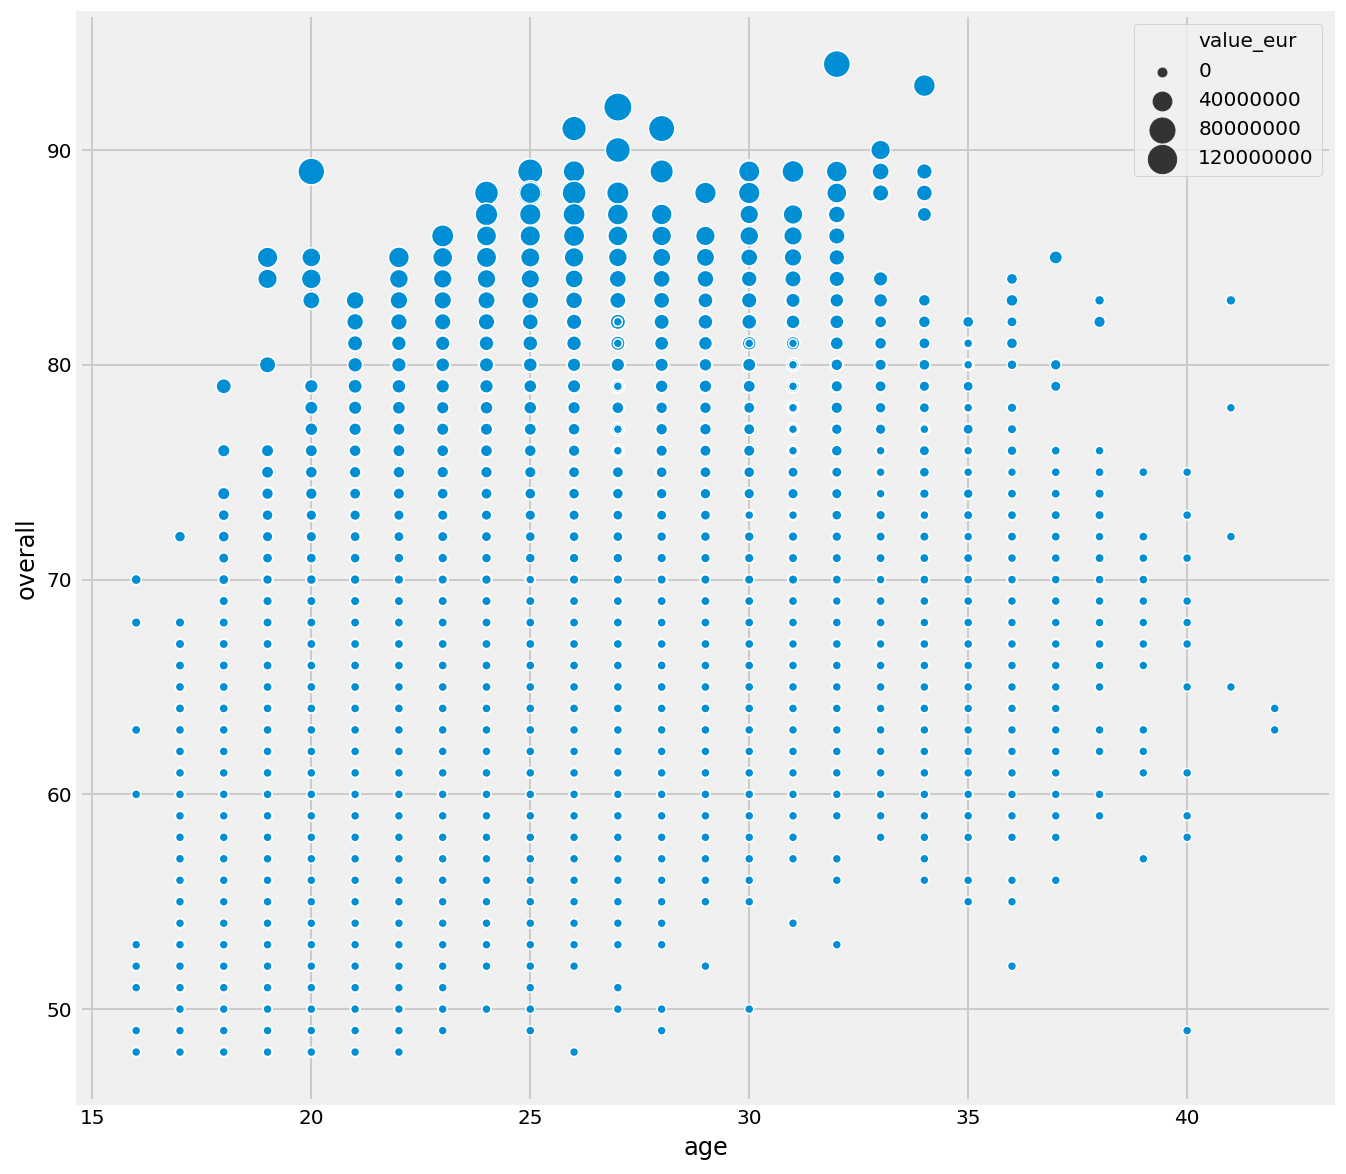

In [133]:
# plot overall score against age, with player's value as an identifier

plt.figure(figsize=(10,10))
plt.subplots(figsize = (10,10))

sns.scatterplot(x = "age", y = "overall", size = 'value_eur', sizes = (20, 200), data=fifa)

<Figure size 720x720 with 0 Axes>

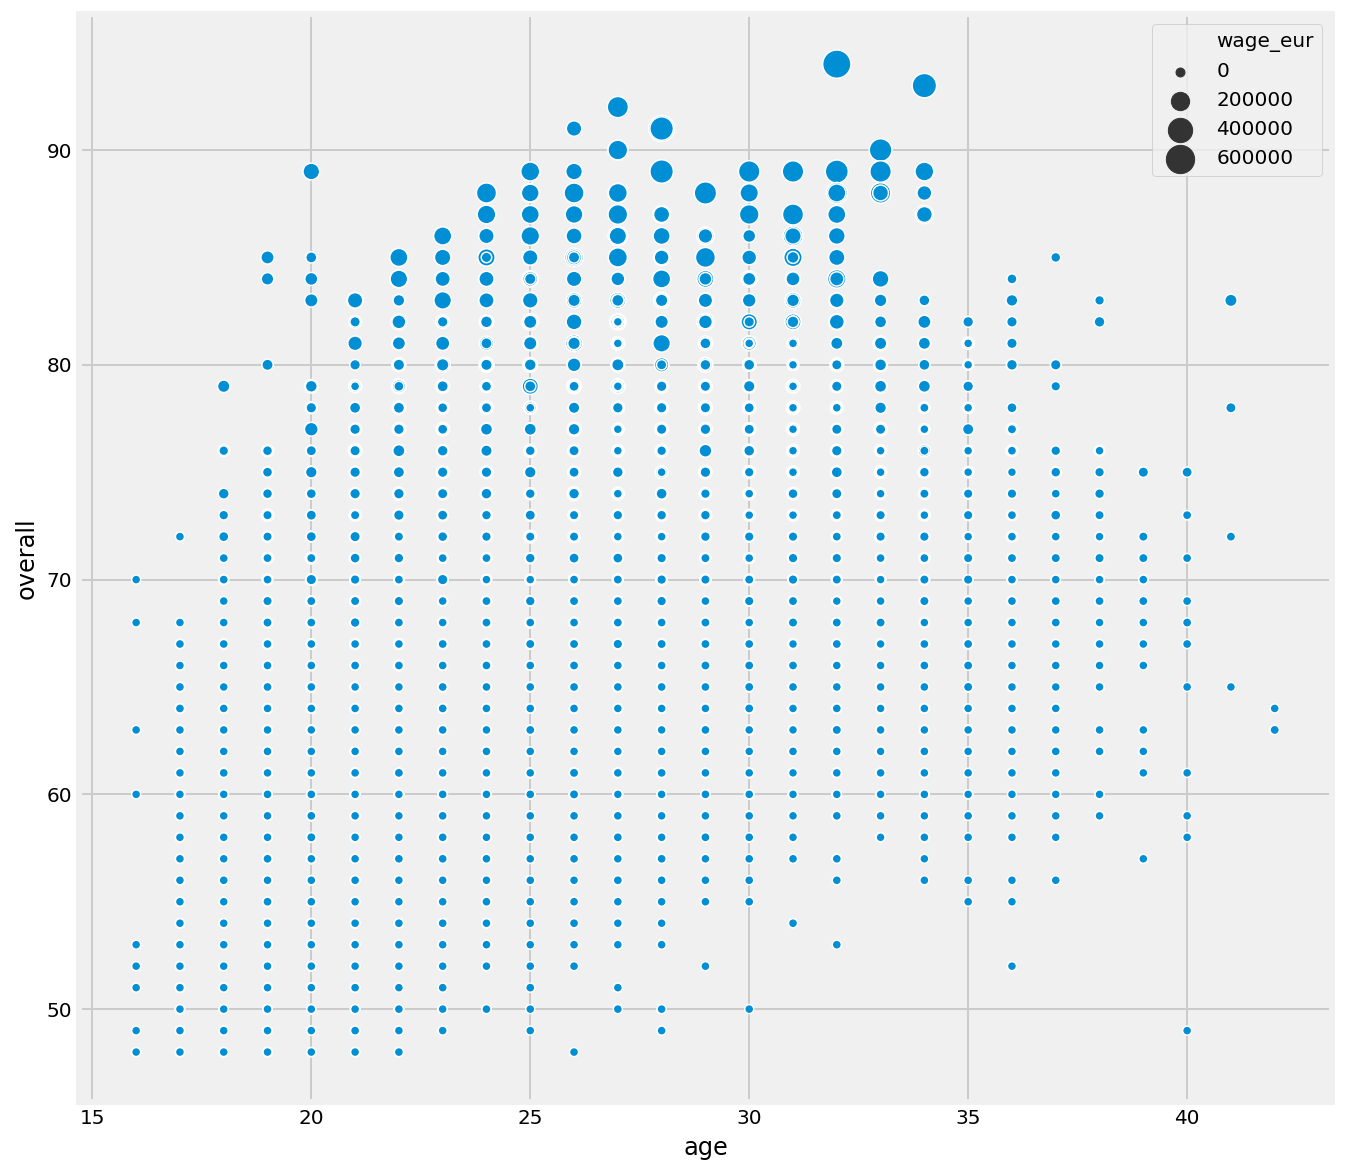

In [134]:
# plot overall score against age, with player's wages as an identifier:

plt.figure(figsize=(10,10))
plt.subplots(figsize = (10,10))

sns.scatterplot(x = "age", y = "overall", size = 'wage_eur', sizes=(20, 200), data=fifa)

From the above 2 plots, it can be seen that there is a positive trend between overall scores (player's ability) and his value in the market/wages earned.

There is also a positive trend between age and overall score, though this isn't all too obvious. Explore this trend further:

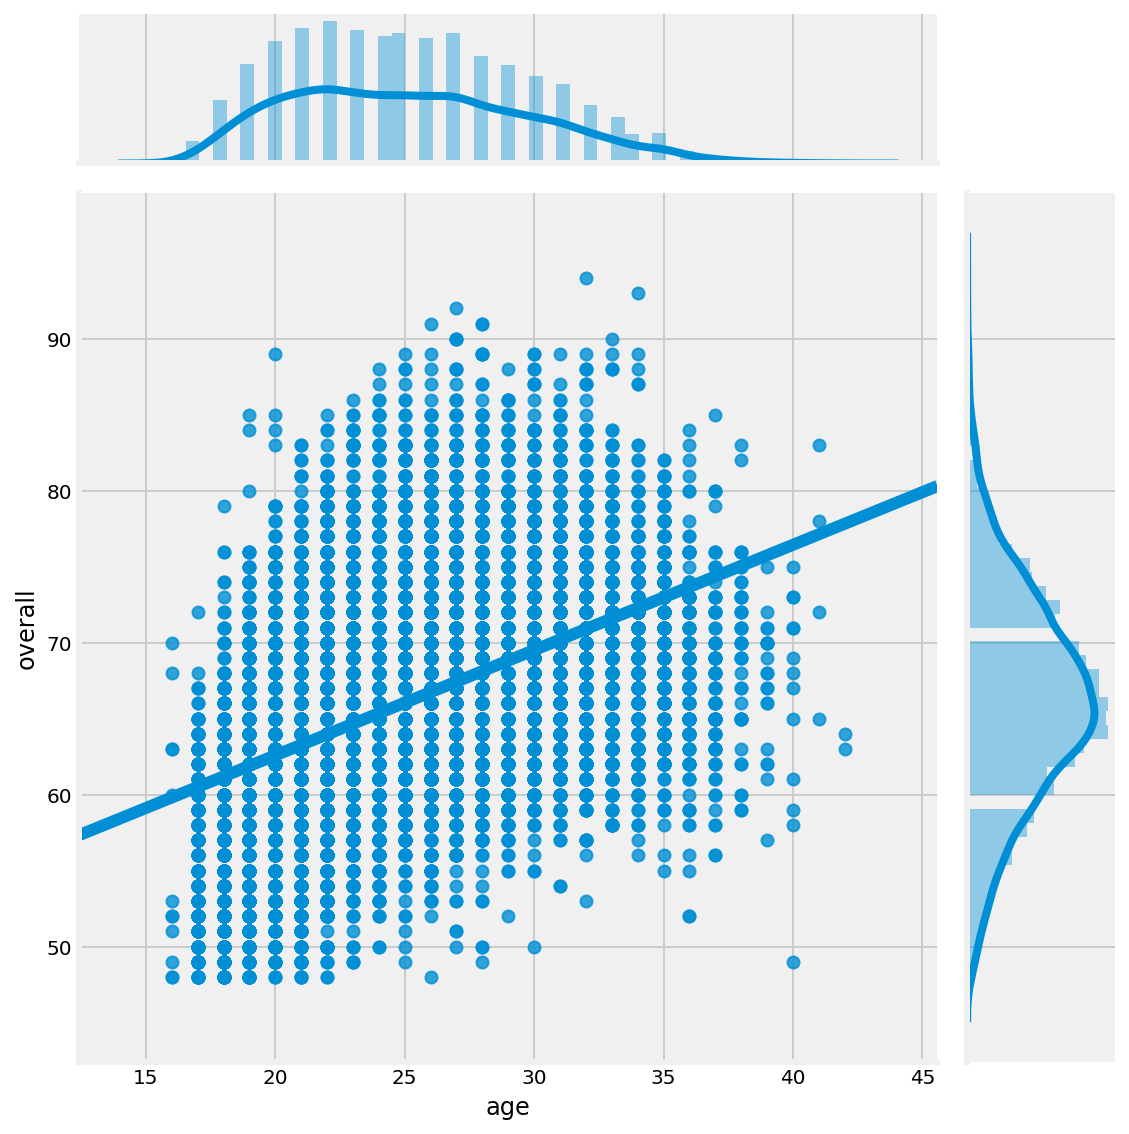

In [135]:
sns.jointplot(x='age', y='overall', data=fifa, kind="reg", height = 8)

Thus, the positive trend between overall score and age is clearer to see here.

But there is also the general consensus that a player's ability starts to peak from age 28 years old till around 32 years old. The above plot doesn't really seem to show that. Hence, make use of other plots to examine this consensus:

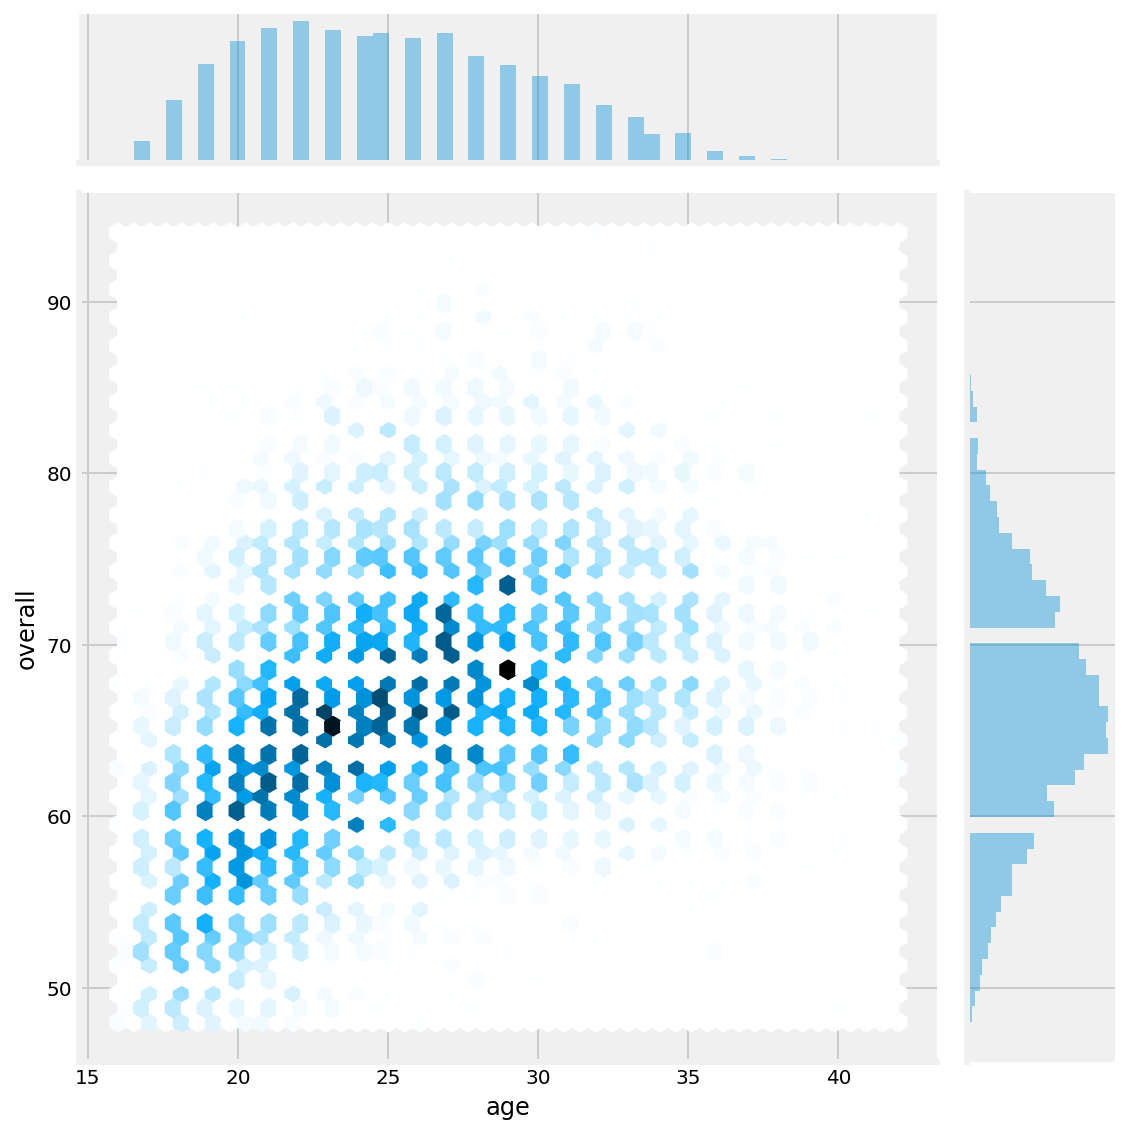

In [136]:
sns.jointplot(x='age', y='overall', data=fifa, kind="hex", height = 8)

A hexbin plot seems to confirm this consensus, as the age-overall positive trend starts to tail off after 30 years old.

#### Player's Spider Plots

Create spider plot for Lionel Messi, the main character of this business problem, using plotly:

In [137]:
pip install plotly==4.4.1

Note: you may need to restart the kernel to use updated packages.


In [138]:
# first create a DataFrame of his basic attributes:

messi_basic_df = pd.DataFrame(fifa.iloc[0][basic_attr])
messi_basic_df.rename(columns={0:"Messi"}, inplace=True)
messi_basic_df

Messi
overall      94
potential    94
pace         87
shooting     92
passing      92
dribbling    96
defending    39
physic       66

In [139]:
# create the spider plot itself:

import plotly.express as px
fig = px.line_polar(messi_basic_df, r=messi_basic_df.Messi, theta=messi_basic_df.index, line_close=True)
fig.update_traces(fill='toself')
fig.show()

For future project purposes, it will be good to be able to create an overlapping spider plot of another player, for quick comparisons.

I will attempt one by choosing Cristiano Ronaldo as the player of comparison (using his basic attributes as well):

In [140]:
# first create a DataFrame of Ronaldo's basic attributes:

ronaldo_basic_df = pd.DataFrame(fifa.iloc[1][basic_attr])
ronaldo_basic_df.rename(columns={1:"Ronaldo"}, inplace=True)
ronaldo_basic_df

Ronaldo
overall        93
potential      93
pace           90
shooting       93
passing        82
dribbling      89
defending      35
physic         78

In [141]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=messi_basic_df.Messi,
      theta=messi_basic_df.index,
      fill='toself',
      name='Messi'
))
fig.add_trace(go.Scatterpolar(
      r=ronaldo_basic_df.Ronaldo,
      theta=ronaldo_basic_df.index,
      fill='toself',
      name='Ronaldo'
))

fig.show()

In [142]:
# concatenate both dataframes for detailed comparison, just to check:

compare_df = pd.concat([messi_basic_df, ronaldo_basic_df], axis=1, sort=False)
compare_df

Messi Ronaldo
overall      94      93
potential    94      93
pace         87      90
shooting     92      93
passing      92      82
dribbling    96      89
defending    39      35
physic       66      78

Indeed, the differences in attribute values match.

I will be using such players' spider plots in the subsequent implementation of the recommender system.

In [143]:
# create function that will generate spider plots for any 2 given players:

def players_spiderplot(player1, player2, attributes = basic_attr):
    player1_index = fifa.loc[fifa.short_name == player1].index
    player1_df = pd.DataFrame(fifa.iloc[player1_index][attributes]).T
    player1_df.rename(columns={int(player1_index.values): player1}, inplace=True)    
    
    player2_index = fifa.loc[fifa.short_name == player2].index
    player2_df = pd.DataFrame(fifa.iloc[player2_index][attributes]).T
    player2_df.rename(columns={int(player2_index.values): player2}, inplace=True)
    
    fig = go.Figure()
                             
    fig.add_trace(go.Scatterpolar(
        r=player1_df[player1],
        theta=attributes,
        fill='toself',
        name=player1))
    
    fig.add_trace(go.Scatterpolar(
        r=player2_df[player2],
        theta=attributes,
        fill='toself',
        name=player2))
        
    print(player1_df)   
    print("")
    print(player2_df)
    
    return fig.show()

In [144]:
players_spiderplot('Sergio Ramos', 'M. Reus')

           Sergio Ramos
overall              89
potential            89
pace                 72
shooting             68
passing              75
dribbling            73
defending            87
physic               85

           M. Reus
overall         88
potential       88
pace            85
shooting        88
passing         84
dribbling       87
defending       45
physic          66


In [151]:
players_spiderplot('Bruno Fernandes', 'M. Gotze', attributes = pos_scores)

     Bruno Fernandes
ls                79
st                79
rs                79
lw                83
lf                83
cf                83
rf                83
rw                83
lam               84
cam               84
ram               84
lm                84
lcm               84
cm                84
rcm               84
rm                84
lwb               77
ldm               77
cdm               77
rdm               77
rwb               77
lb                74
lcb               68
cb                68
rcb               68
rb                74

     M. Gotze
ls         77
st         77
rs         77
lw         82
lf         82
cf         82
rf         82
rw         82
lam        84
cam        84
ram        84
lm         83
lcm        82
cm         82
rcm        82
rm         83
lwb        73
ldm        72
cdm        72
rdm        72
rwb        73
lb         69
lcb        62
cb         62
rcb        62
rb         69
